In [1]:
%%html
<link rel="stylesheet" type="text/css" href="rise.css" />

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = [8, 6]

# Neural Network (NN)

# Diabetes score as a function of 10 other measures in human patients

In [3]:
import pandas as pd

# Meseares of various features and diabetes disease progression for 442 patients.
# Available at https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt
df = pd.read_csv('data/diabetes.csv')
df

AGE  SEX   BMI      BP   TC    LDL   HDL   TCH     LTG  GLU  DIS
0     59    2  32.1  101.00  157   93.2  38.0  4.00  4.8598   87  151
1     48    1  21.6   87.00  183  103.2  70.0  3.00  3.8918   69   75
2     72    2  30.5   93.00  156   93.6  41.0  4.00  4.6728   85  141
3     24    1  25.3   84.00  198  131.4  40.0  5.00  4.8903   89  206
4     50    1  23.0  101.00  192  125.4  52.0  4.00  4.2905   80  135
..   ...  ...   ...     ...  ...    ...   ...   ...     ...  ...  ...
437   60    2  28.2  112.00  185  113.8  42.0  4.00  4.9836   93  178
438   47    2  24.9   75.00  225  166.0  42.0  5.00  4.4427  102  104
439   60    2  24.9   99.67  162  106.6  43.0  3.77  4.1271   95  132
440   36    1  30.0   95.00  201  125.2  42.0  4.79  5.1299   85  220
441   36    1  19.6   71.00  250  133.2  97.0  3.00  4.5951   92   57

[442 rows x 11 columns]

### Question?

If your goal is to predict diabetes scores based on other measurements in patients, what type of analysis will you do?

- Regression
- Classification
- Clustering
- Dimensionality reduction

Extract feature and target variables from the dataframe.

In [288]:
X = df.loc[:,'AGE':'GLU']
y = df['DIS']

X.shape, y.shape

((442, 10), (442,))

Split the dataset into training and testing sets.

You'll train your models on the training set and evaluate their error on the testing set.

In [289]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.4, random_state=3)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((265, 10), (177, 10), (265,), (177,))

### Exercise
Use simple linear regression to predict diabetes score based on 10 other measures for each of 442 patients.

In [130]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# # train a linear regression model on the training set
# lr_model = ...
# ...

# # eval model's test error
# lr_test_pred = ...
# lr_test_MSE = mean_squared_error(y_test, lr_test_pred)

# # diabetes score prediction for the first patient in the testing set
# lr_model.predict(X_test[:1])

array([97.61320682])

### Exercise key
Use simple linear regression to predict diabetes score based on 10 other measures for each of 442 patients.

In [171]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# train a linear regression model on the training set
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# eval model's test error
lr_test_pred = lr_model.predict(X_test)
lr_test_MSE = mean_squared_error(y_test, lr_test_pred)

# diabetes score prediction for the first patient in the testing set
lr_model.predict(X_test[:1])

array([97.61320682])

Visualize the regression.

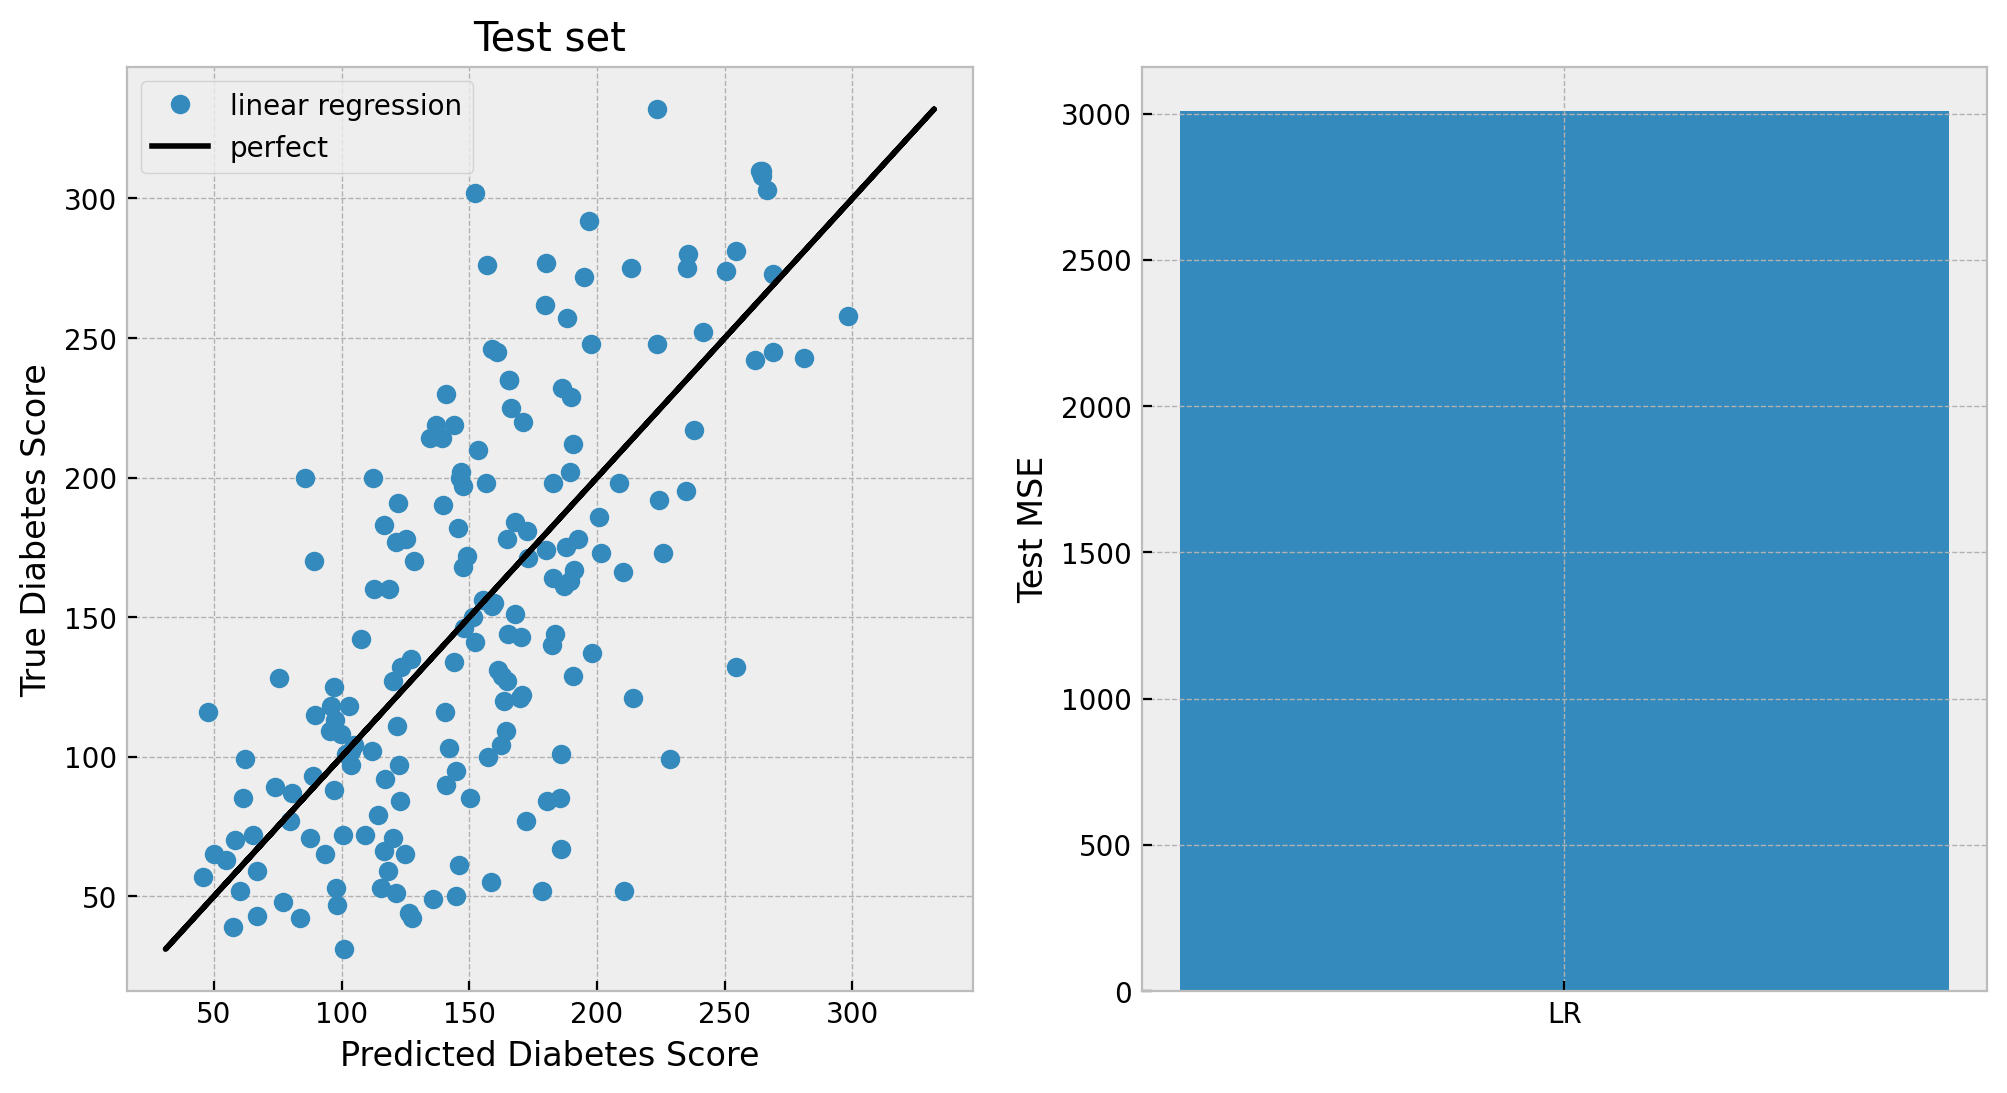

In [174]:
plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(lr_test_pred, y_test, 'o', label='linear regression')
plt.plot(y_test, y_test, 'k-', label='perfect')
plt.xlabel('Predicted Diabetes Score')
plt.ylabel('True Diabetes Score')
plt.title('Test set')
plt.legend();

plt.subplot(1, 2, 2)
plt.bar(['LR'], [lr_test_MSE])
plt.ylabel('Test MSE');

Now let's use a neural network for this regression.

[sklearn.neural_network.MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html)

In [290]:
# multi layer perceptron regressor
from sklearn.neural_network import MLPRegressor

# neural network
#   1 hidden layer of 100 neurons
#   1 output layer for regression of a single target variable
net_1x100 = MLPRegressor(hidden_layer_sizes=[100], random_state=1, max_iter=1000)

# train model on the training set
net_1x100.fit(X_train, y_train)

# eval model's test error
net_1x100_test_pred = net_1x100.predict(X_test)
net_1x100_test_MSE = mean_squared_error(y_test, net_1x100_test_pred)

# diabetes score prediction for the first patient in the testing set
net_1x100.predict(X_test[:1])

array([104.18836831])

Visualize the training of the neural network.

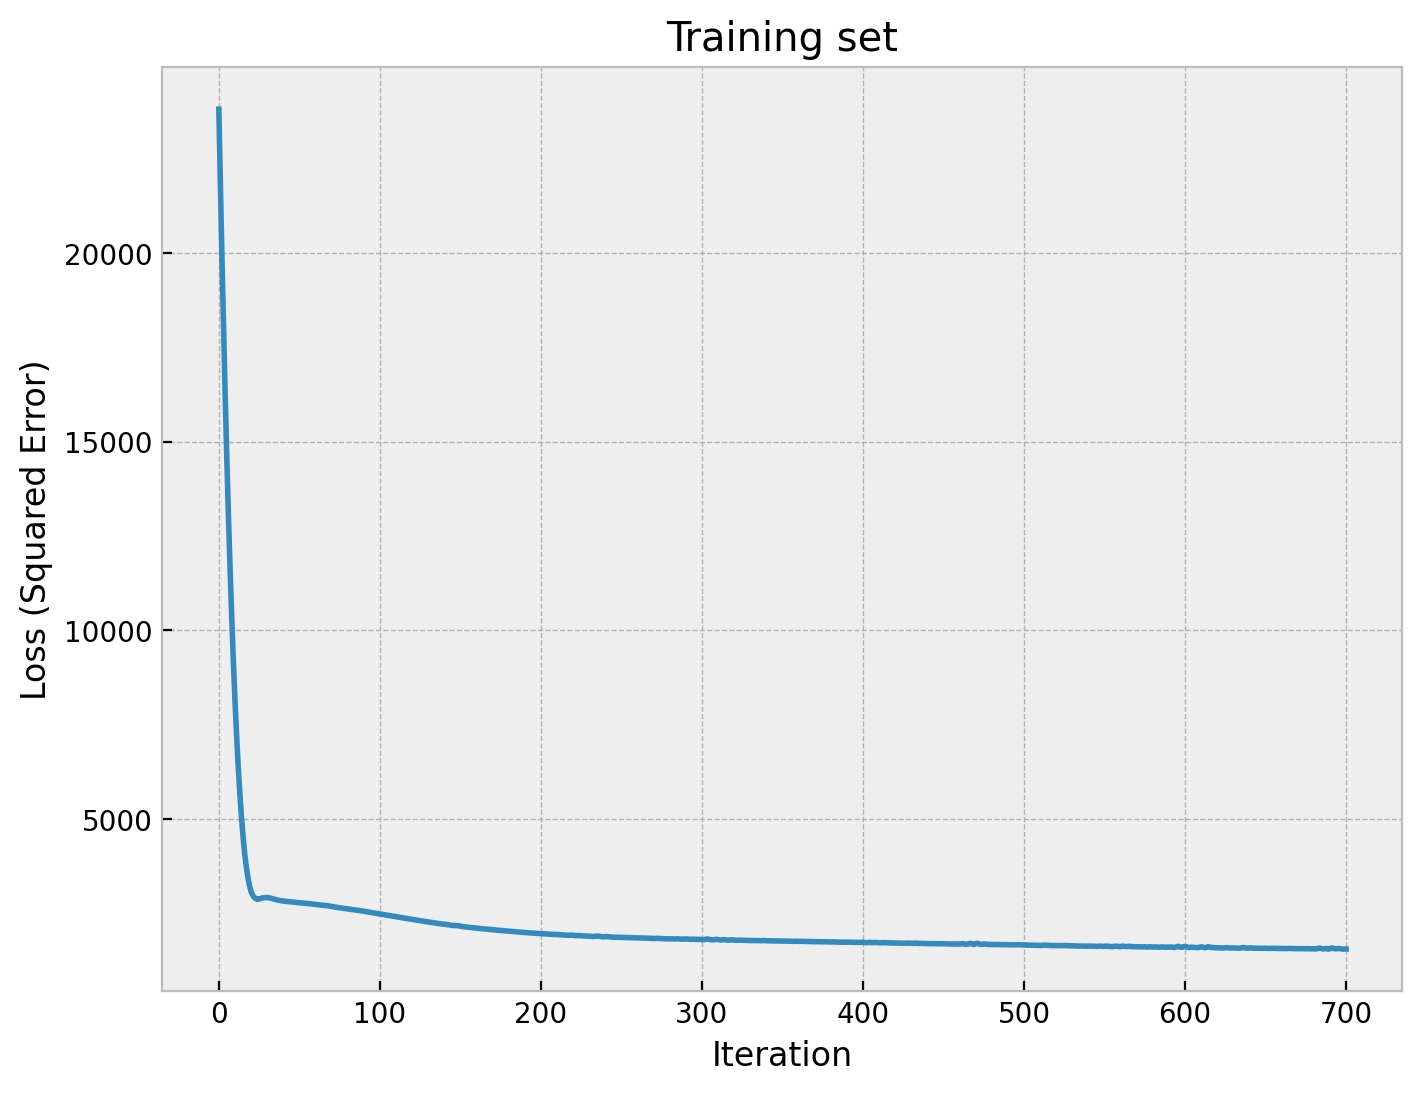

In [295]:
plt.plot(net_1x100.loss_curve_)
plt.xlabel('Iteration')
plt.ylabel('Loss (Squared Error)')
plt.title('Training set');

Visualize the regression.

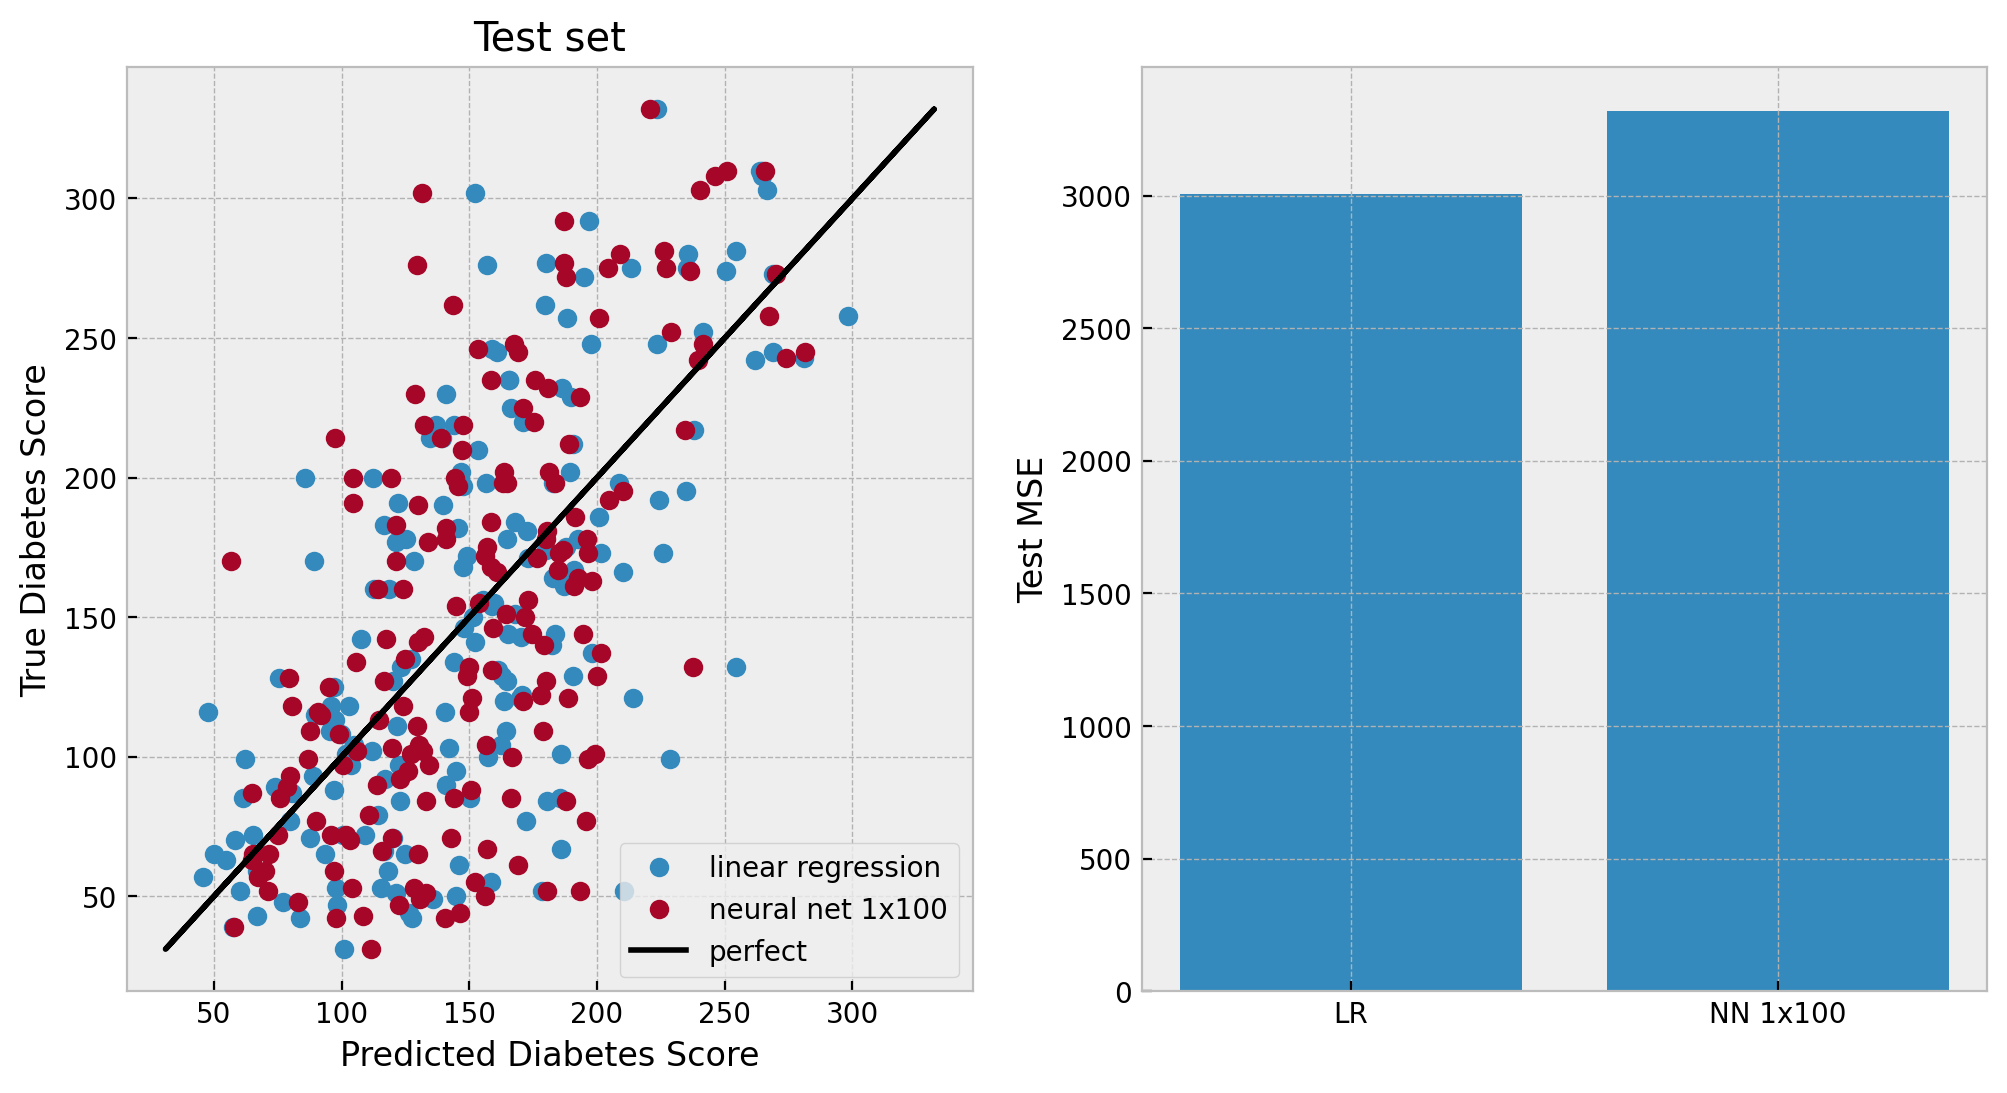

In [223]:
plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(lr_test_pred, y_test, 'o', label='linear regression')
plt.plot(net_1x100_test_pred, y_test, 'o', label='neural net 1x100')
plt.plot(y_test, y_test, 'k-', label='perfect')
plt.xlabel('Predicted Diabetes Score')
plt.ylabel('True Diabetes Score')
plt.title('Test set')
plt.legend();

plt.subplot(1, 2, 2)
plt.bar(['LR', 'NN 1x100'], [lr_test_MSE, net_1x100_test_MSE])
plt.ylabel('Test MSE');

Let's compare the training and testing errors for both models.

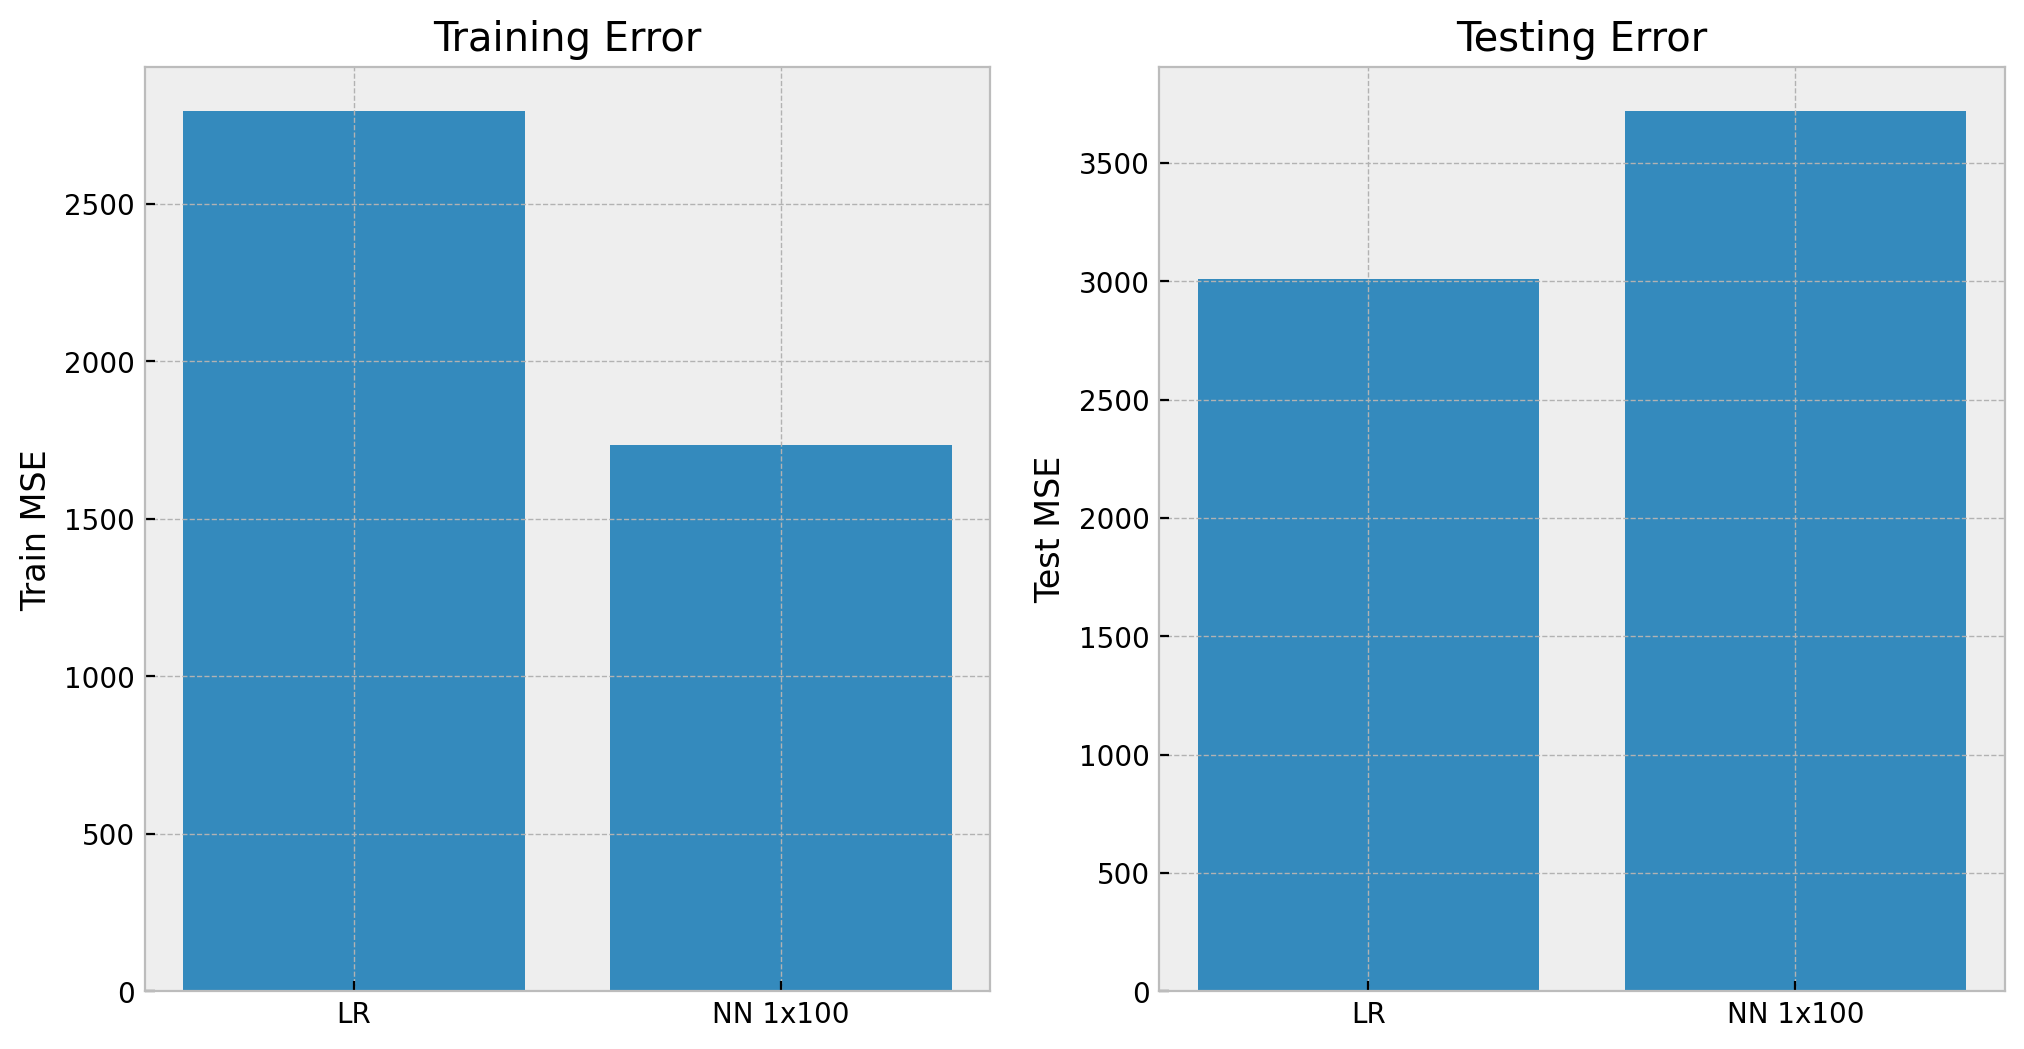

In [101]:
lr_train_pred = lr_model.predict(X_train)
lr_train_MSE = mean_squared_error(y_train, lr_train_pred)

net_1x100_train_pred = net.predict(X_train)
net_1x100_train_MSE = mean_squared_error(y_train, net_1x100_train_pred)

plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.bar(['LR', 'NN 1x100'], [lr_train_MSE, net_1x100_train_MSE])
plt.ylabel('Train MSE')
plt.title('Training Error');

plt.subplot(1, 2, 2)
plt.bar(['LR', 'NN 1x100'], [lr_test_MSE, net_1x100_test_MSE])
plt.ylabel('Test MSE')
plt.title('Testing Error');

What can you conlucde about the neural network in relation to the simple linear regression?

### Exercise
Use a neural network with a single hidden layer of 5,000 neurons to predict diabetes score based on 10 other measures for each of 442 patients.

In [77]:
# neural network
#   1 hidden layer of 5000 neurons
#   1 output layer for regression of a single target variable
net_1x5000 = ...

# train model on the training set
...

# eval model's test error
net_1x5000_test_pred = ...
net_1x5000_test_MSE = mean_squared_error(y_test, net_1x5000_test_pred)

### Exercise key
Use a neural network with a single hidden layer of 5,000 neurons to predict diabetes score based on 10 other measures for each of 442 patients.

In [77]:
# neural network
#   1 hidden layer of 5000 neurons
#   1 output layer for regression of a single target variable
net_1x5000 = MLPRegressor(hidden_layer_sizes=[5000], random_state=1, max_iter=10000)

# train model on the training set
net_1x5000.fit(X_train, y_train)

# eval model's test error
net_1x5000_test_pred = net_1x5000.predict(X_test)
net_1x5000_test_MSE = mean_squared_error(y_test, net_1x5000_test_pred)

Visualize the regression.

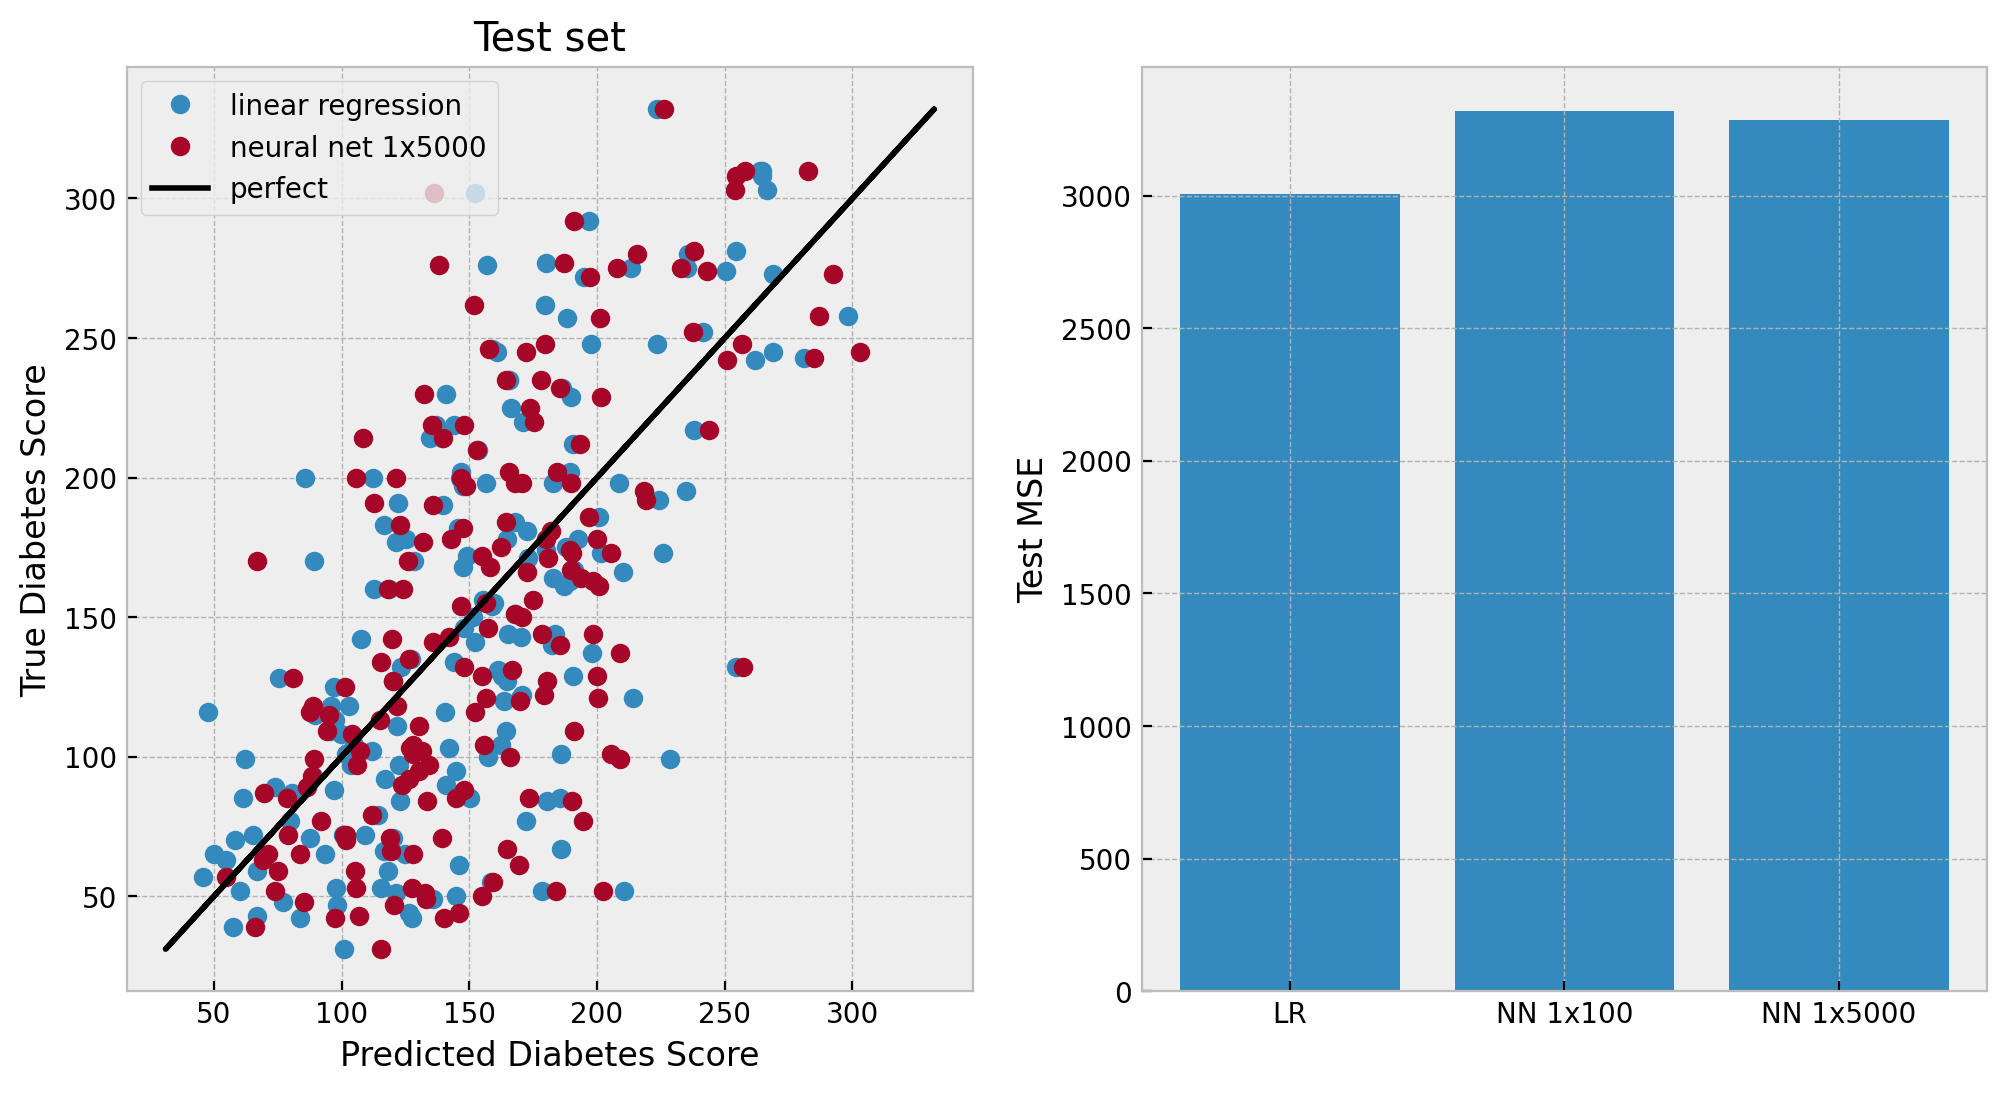

In [176]:
plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(lr_test_pred, y_test, 'o', label='linear regression')
plt.plot(net_1x5000_test_pred, y_test, 'o', label='neural net 1x5000')
plt.plot(y_test, y_test, 'k-', label='perfect')
plt.xlabel('Predicted Diabetes Score')
plt.ylabel('True Diabetes Score')
plt.title('Test set')
plt.legend();

plt.subplot(1, 2, 2)
plt.bar(['LR', 'NN 1x100', 'NN 1x5000'], [lr_test_MSE, net_1x100_test_MSE, net_1x5000_test_MSE])
plt.ylabel('Test MSE');

What if we add more layers?

In [79]:
# neural network
#   5 hidden layers of 30 neurons each
#   1 output layer for regression of a single target variable
net_5x30 = MLPRegressor(hidden_layer_sizes=[30, 30, 30, 30, 30], random_state=1, max_iter=10000)

# train model on the training set
net_5x30.fit(X_train, y_train)

# eval model's test error
net_5x30_test_pred = net_5x30.predict(X_test)
net_5x30_test_MSE = mean_squared_error(y_test, net_5x30_test_pred)

Visualize the regression.

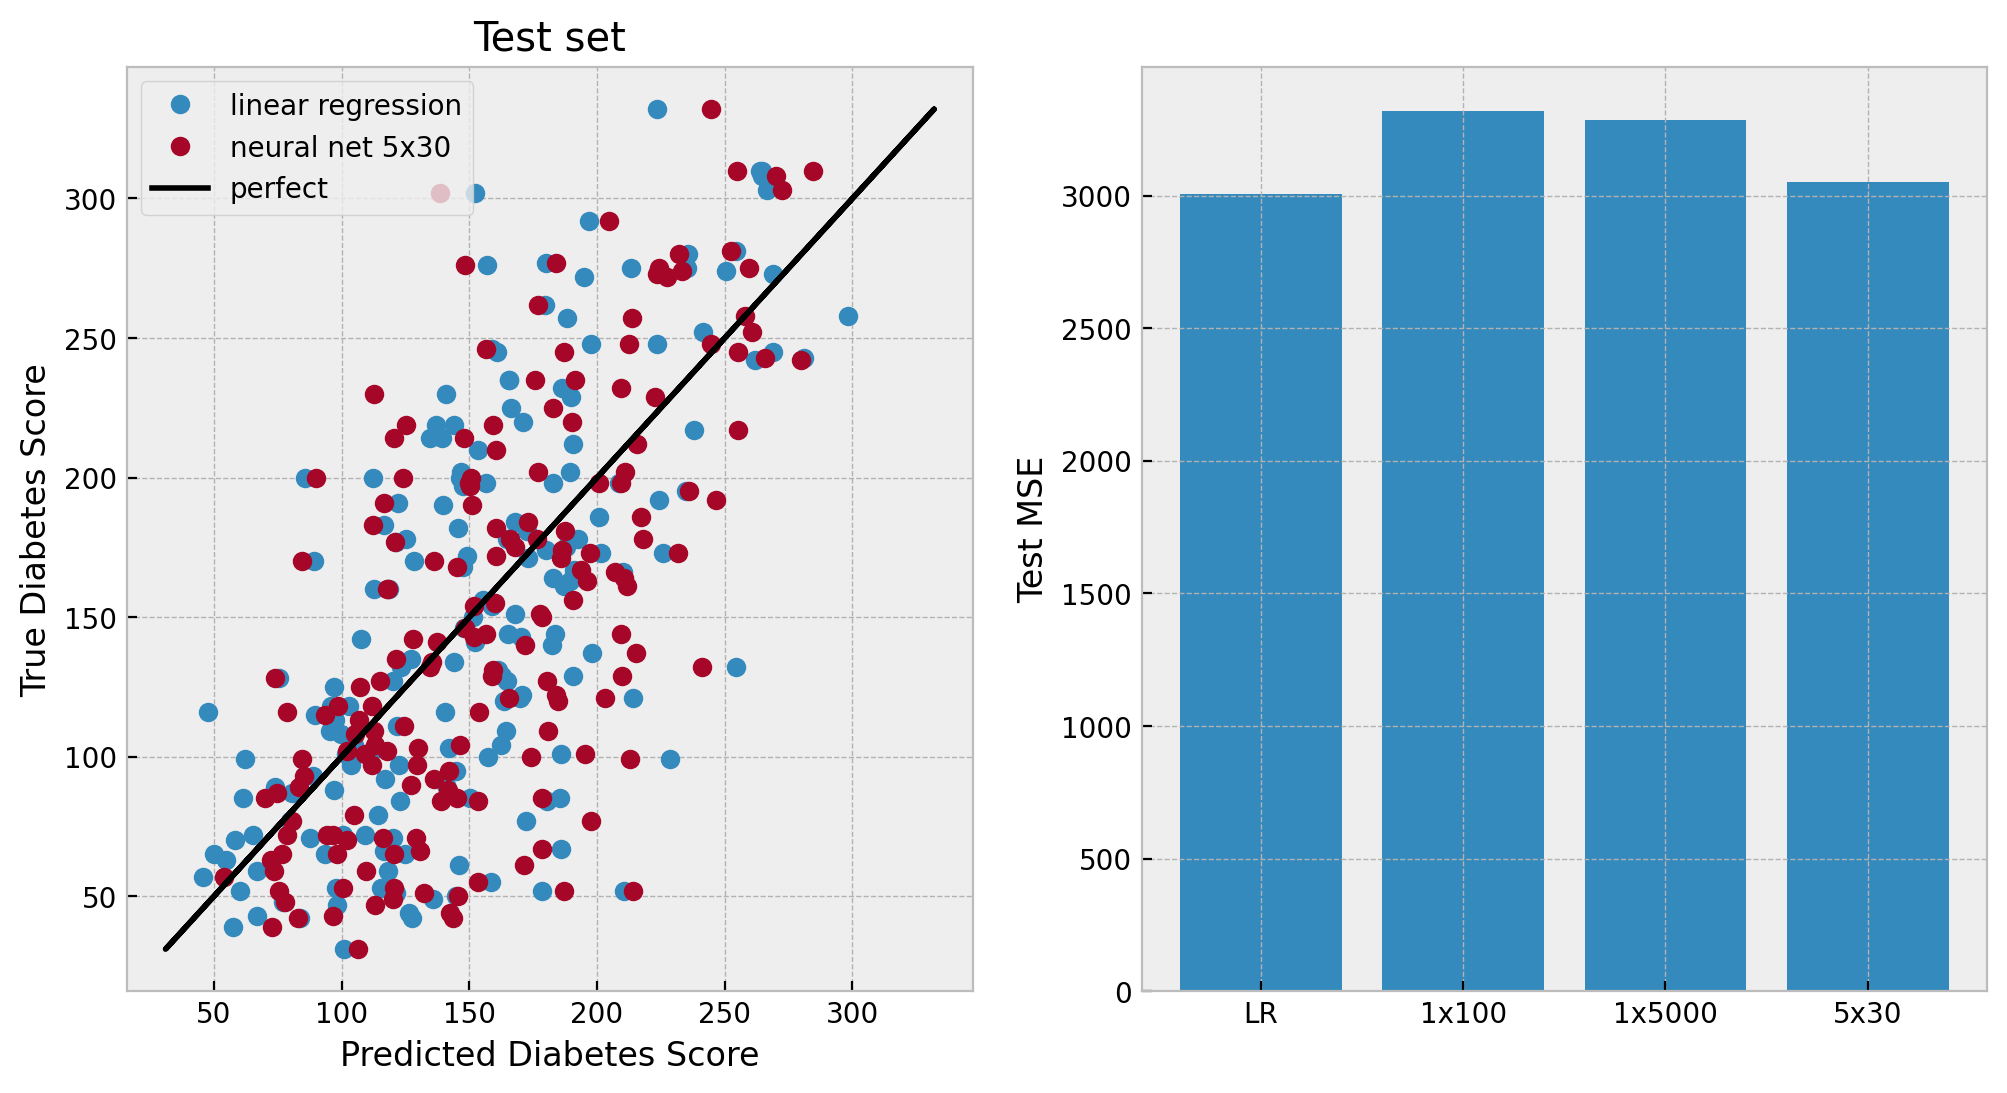

In [177]:
plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(lr_test_pred, y_test, 'o', label='linear regression')
plt.plot(net_5x30_test_pred, y_test, 'o', label='neural net 5x30')
plt.plot(y_test, y_test, 'k-', label='perfect')
plt.xlabel('Predicted Diabetes Score')
plt.ylabel('True Diabetes Score')
plt.title('Test set')
plt.legend();

plt.subplot(1, 2, 2)
plt.bar(['LR', '1x100', '1x5000', '5x30'], [lr_test_MSE, net_1x100_test_MSE, net_1x5000_test_MSE, net_5x30_test_MSE])
plt.ylabel('Test MSE');

What if we add even more layers and neurons?

In [84]:
# neural network
#   10 hidden layers of 1000 neurons each
#   1 output layer for regression of a single target variable
net_10x1000 = MLPRegressor(hidden_layer_sizes=[1000]*10, random_state=1, max_iter=10000)

# train model on the training set
net_10x1000.fit(X_train, y_train)

# eval model's test error
net_10x1000_test_pred = net_10x1000.predict(X_test)
net_10x1000_test_MSE = mean_squared_error(y_test, net_10x1000_test_pred)

Visualize the regression.

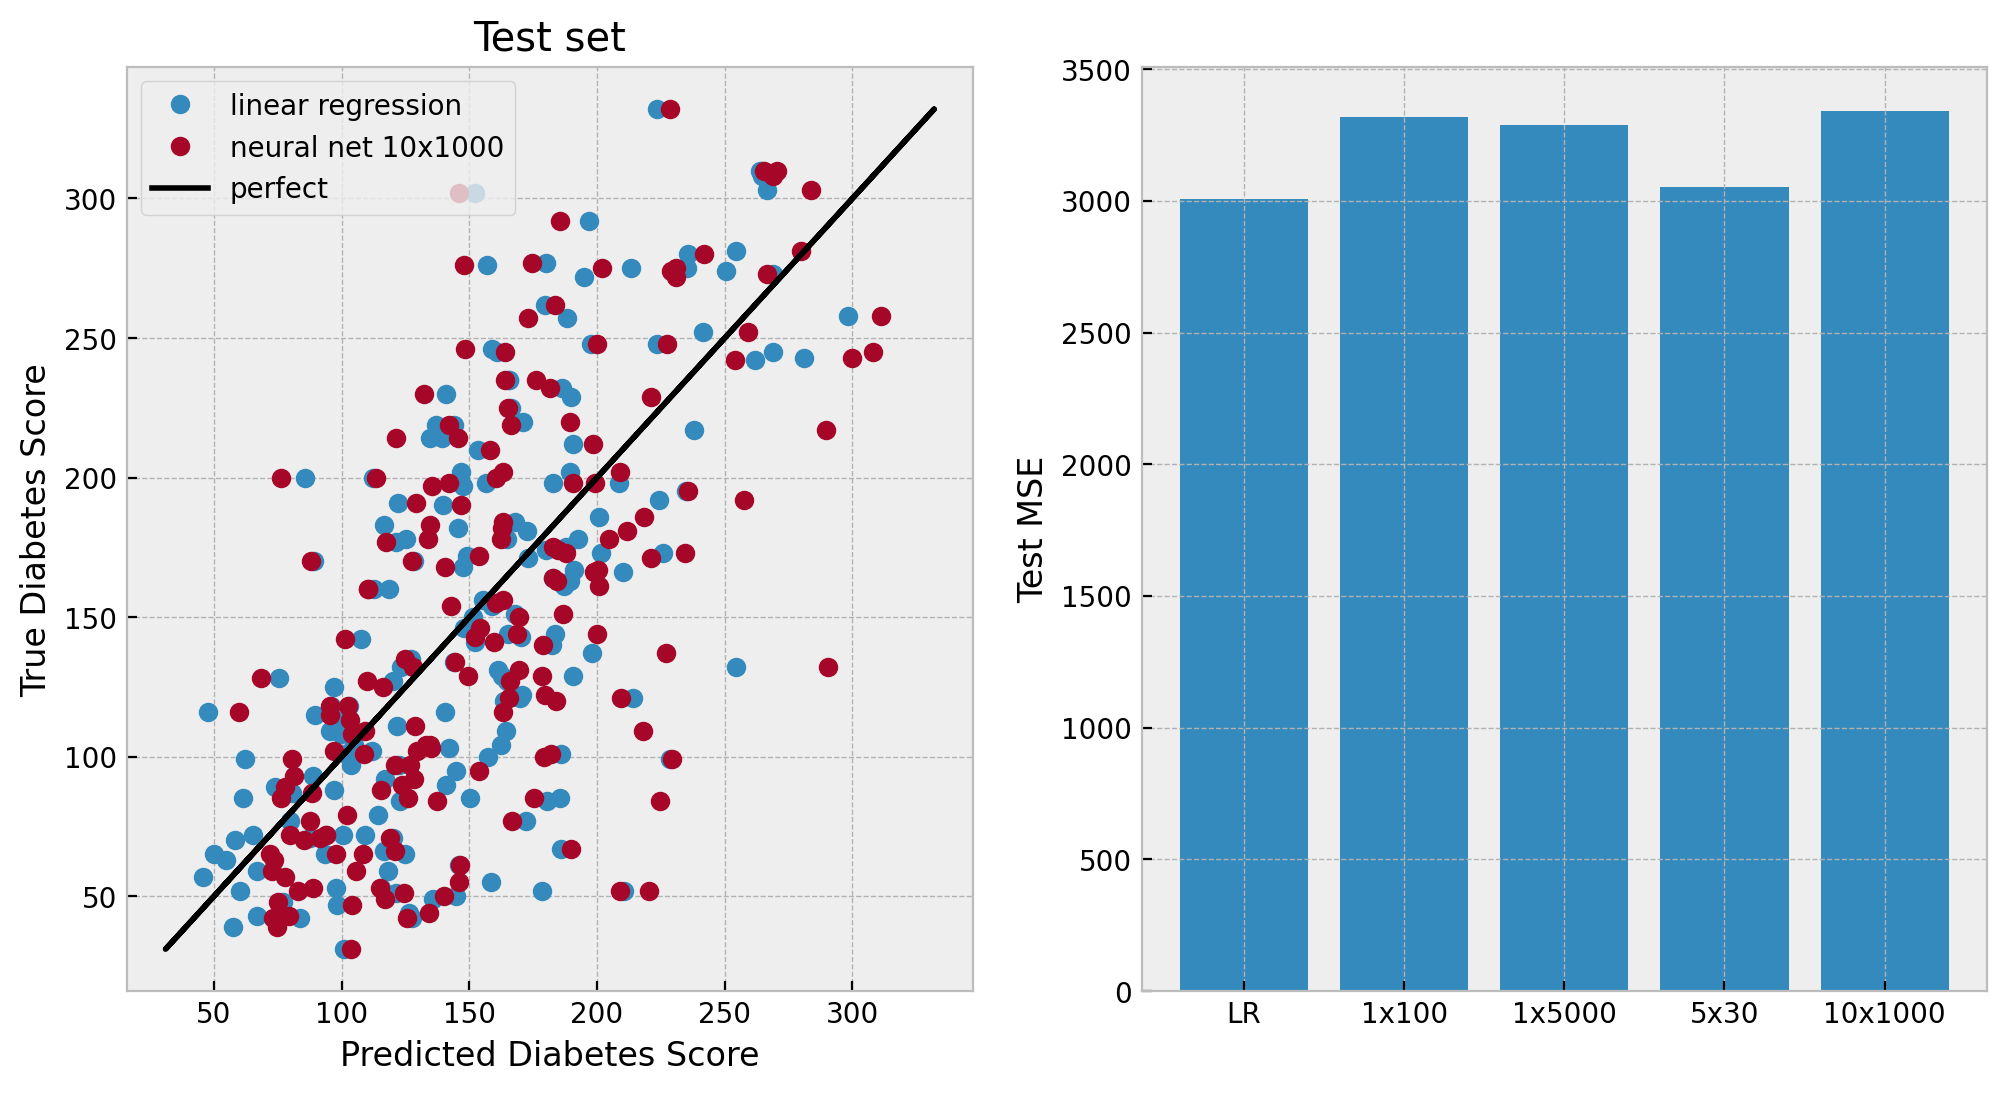

In [178]:
plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(lr_test_pred, y_test, 'o', label='linear regression')
plt.plot(net_10x1000_test_pred, y_test, 'o', label='neural net 10x1000')
plt.plot(y_test, y_test, 'k-', label='perfect')
plt.xlabel('Predicted Diabetes Score')
plt.ylabel('True Diabetes Score')
plt.title('Test set')
plt.legend();

plt.subplot(1, 2, 2)
plt.bar(['LR', '1x100', '1x5000', '5x30', '10x1000'], 
        [lr_test_MSE, net_1x100_test_MSE, net_1x5000_test_MSE, net_5x30_test_MSE, net_10x1000_test_MSE])
plt.ylabel('Test MSE');

# Mouse V1 activity in response to gratings of varying orientation

Mouse V1 data from Stringer et al. (2019)
https://www.biorxiv.org/content/10.1101/679324v2.abstract

![](images/grating-mouse.png)

These data comprise time-averaged responses of ~20,000 neurons to ~4,000 stimulus gratings of different orientations from 0-360 degrees, recorded through Calcium imaging. The responses have been normalized by spontaneous levels of activity and then z-scored over stimuli, so expect negative numbers. They have also been binned and averaged to each degree of orientation.

Example from [Neuromatch Academy](https://compneuro.neuromatch.io/tutorials/W2D1_DeepLearning/student/W2D1_Tutorial1.html)

Calcium imaging measures of activity from 23,589 neurons in V1 in response to vieweing a grating pattern rotated from 0-360 degrees.

![](images/grating-orientations.png)

In [102]:
neural_responses = np.load('data/neural_responses.npy')
grating_orientations = np.load('data/grating_orientations.npy')

neural_responses.shape, grating_orientations.shape

((360, 23589), (360,))

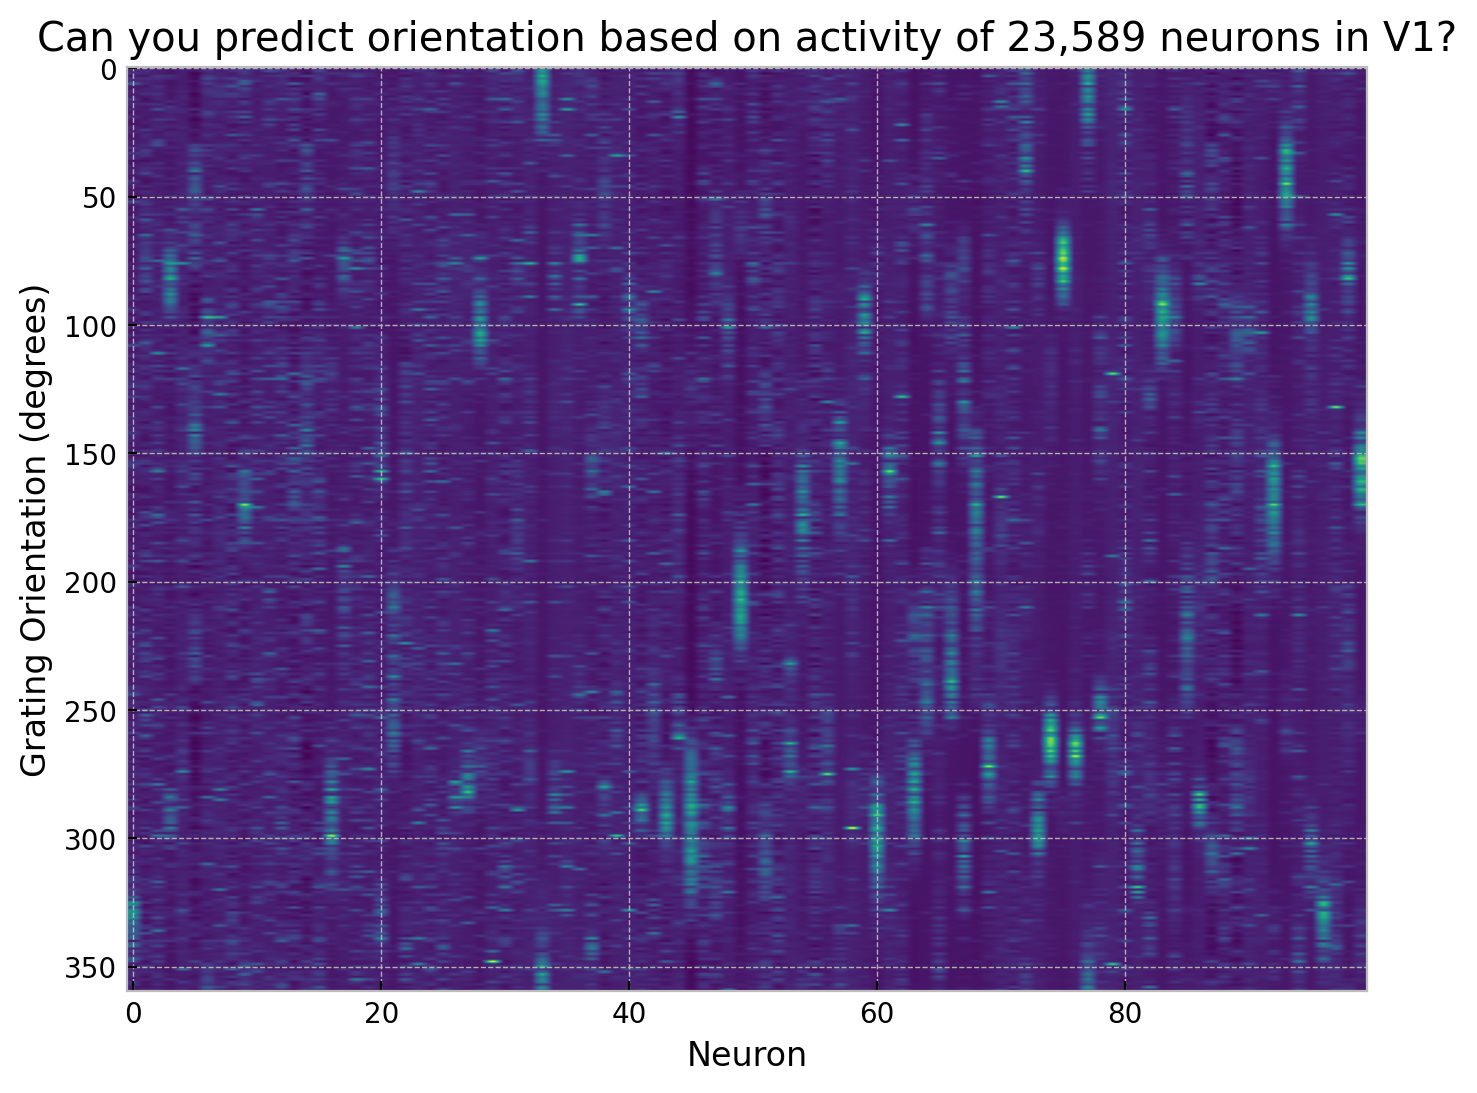

In [167]:
plt.imshow(neural_responses[:,:100], aspect='auto')
plt.xlabel('Neuron')
plt.ylabel('Grating Orientation (degrees)')
plt.title('Can you predict orientation based on activity of 23,589 neurons in V1?');

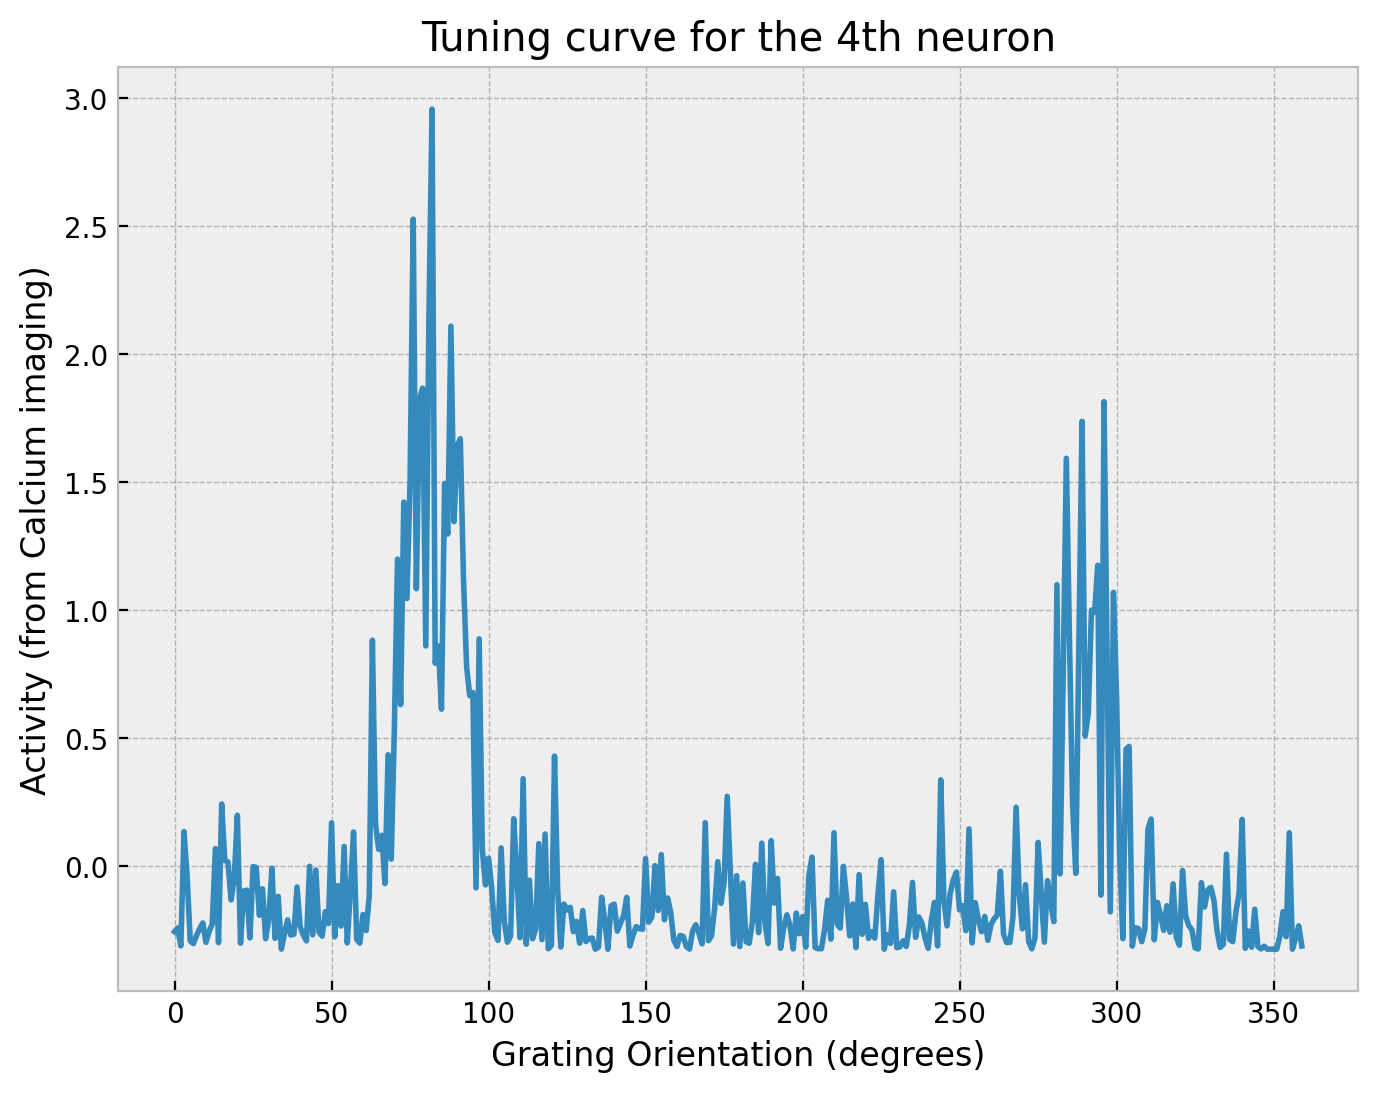

In [108]:
plt.plot(grating_orientations, neural_responses[:,3])
plt.xlabel('Grating Orientation (degrees)')
plt.ylabel('Activity (from Calcium imaging)')
plt.title('Tuning curve for the 4th neuron');

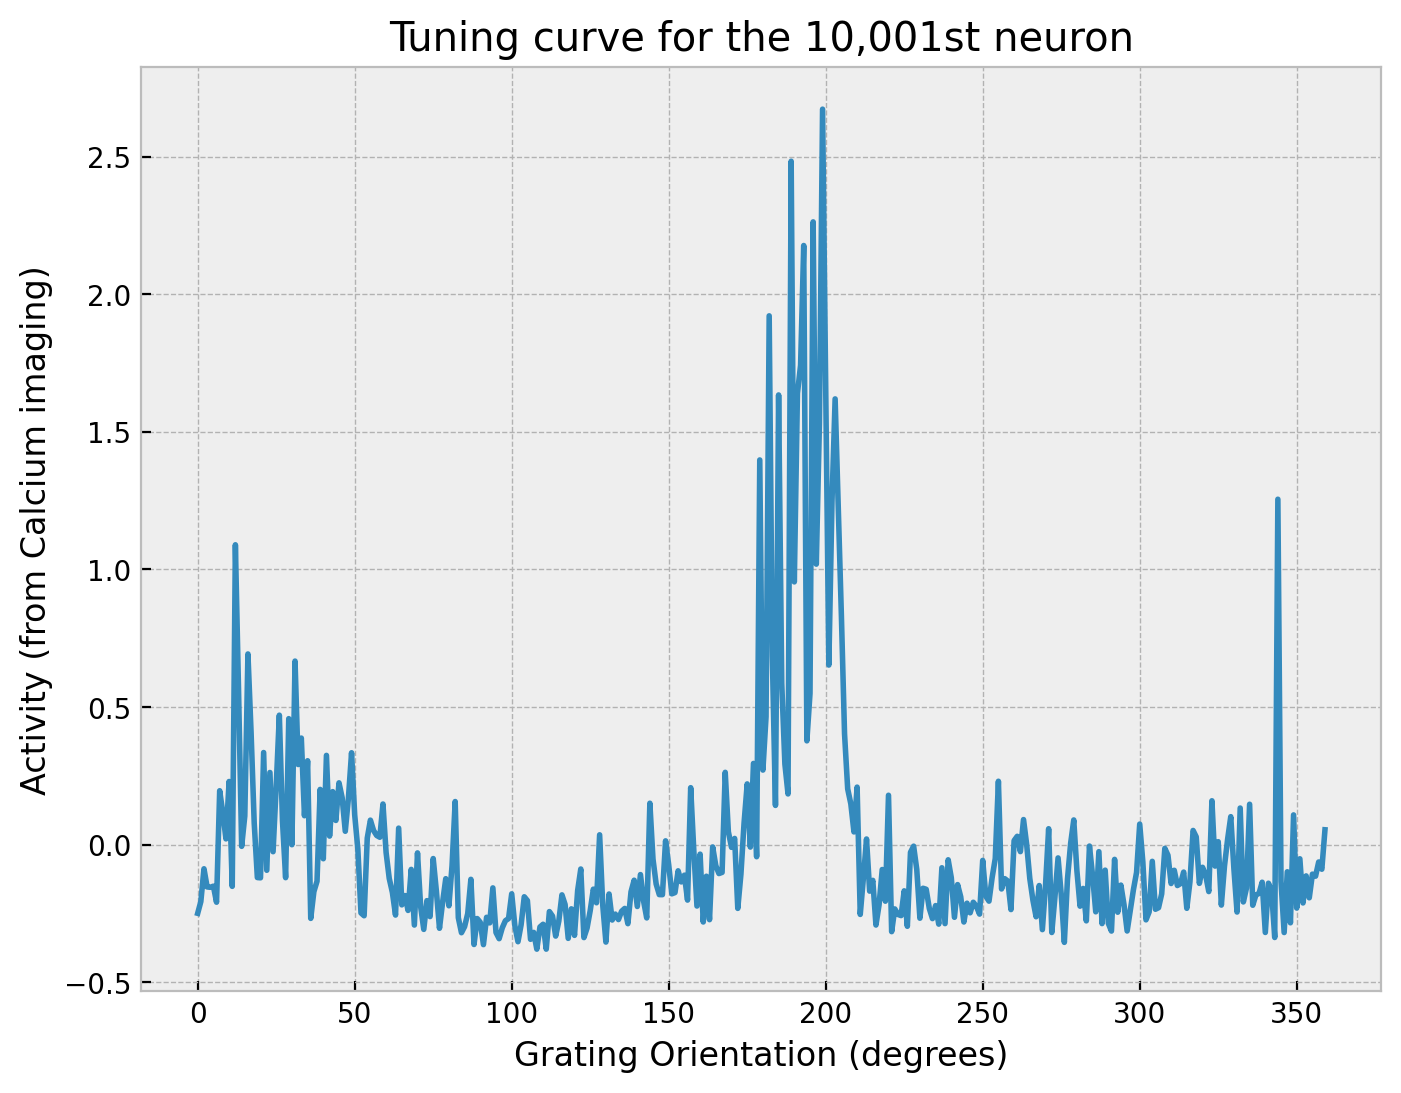

In [161]:
plt.plot(grating_orientations, neural_responses[:,10000])
plt.xlabel('Grating Orientation (degrees)')
plt.ylabel('Activity (from Calcium imaging)')
plt.title('Tuning curve for the 10,001st neuron');

### Question?

If your goal is to predict grating orientation based on neural activity in V1, what type of analysis will you do?

- Regression
- Classification
- Clustering
- Dimensionality reduction

Split the data into training and testing sets.

In [296]:
X = neural_responses
y = grating_orientations

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.4, random_state=3)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((216, 23589), (144, 23589), (216,), (144,))

Train a linear regression model to predict the grating orientation based on the mouse's neural activity.

In [112]:
# train a linear regression model on the training set
lr_v1_model = LinearRegression()
lr_v1_model.fit(X_train, y_train)

# eval model's test error
lr_v1_test_pred = lr_v1_model.predict(X_test)
lr_v1_test_MSE = mean_squared_error(y_test, lr_v1_test_pred)

Train a neural network to predict the grating orientation based on the mouse's neural activity.

In [117]:
# neural network
#   1 hidden layer of 100 neurons
#   1 output layer for regression
net_v1_1x100 = MLPRegressor(hidden_layer_sizes=[100], random_state=1, max_iter=1000)

# train model on the training set
net_v1_1x100.fit(X_train, y_train)

# eval model's test error
net_v1_1x100_test_pred = net_v1_1x100.predict(X_test)
net_v1_1x100_test_MSE = mean_squared_error(y_test, net_v1_1x100_test_pred)

Visualize the training of the neural network.

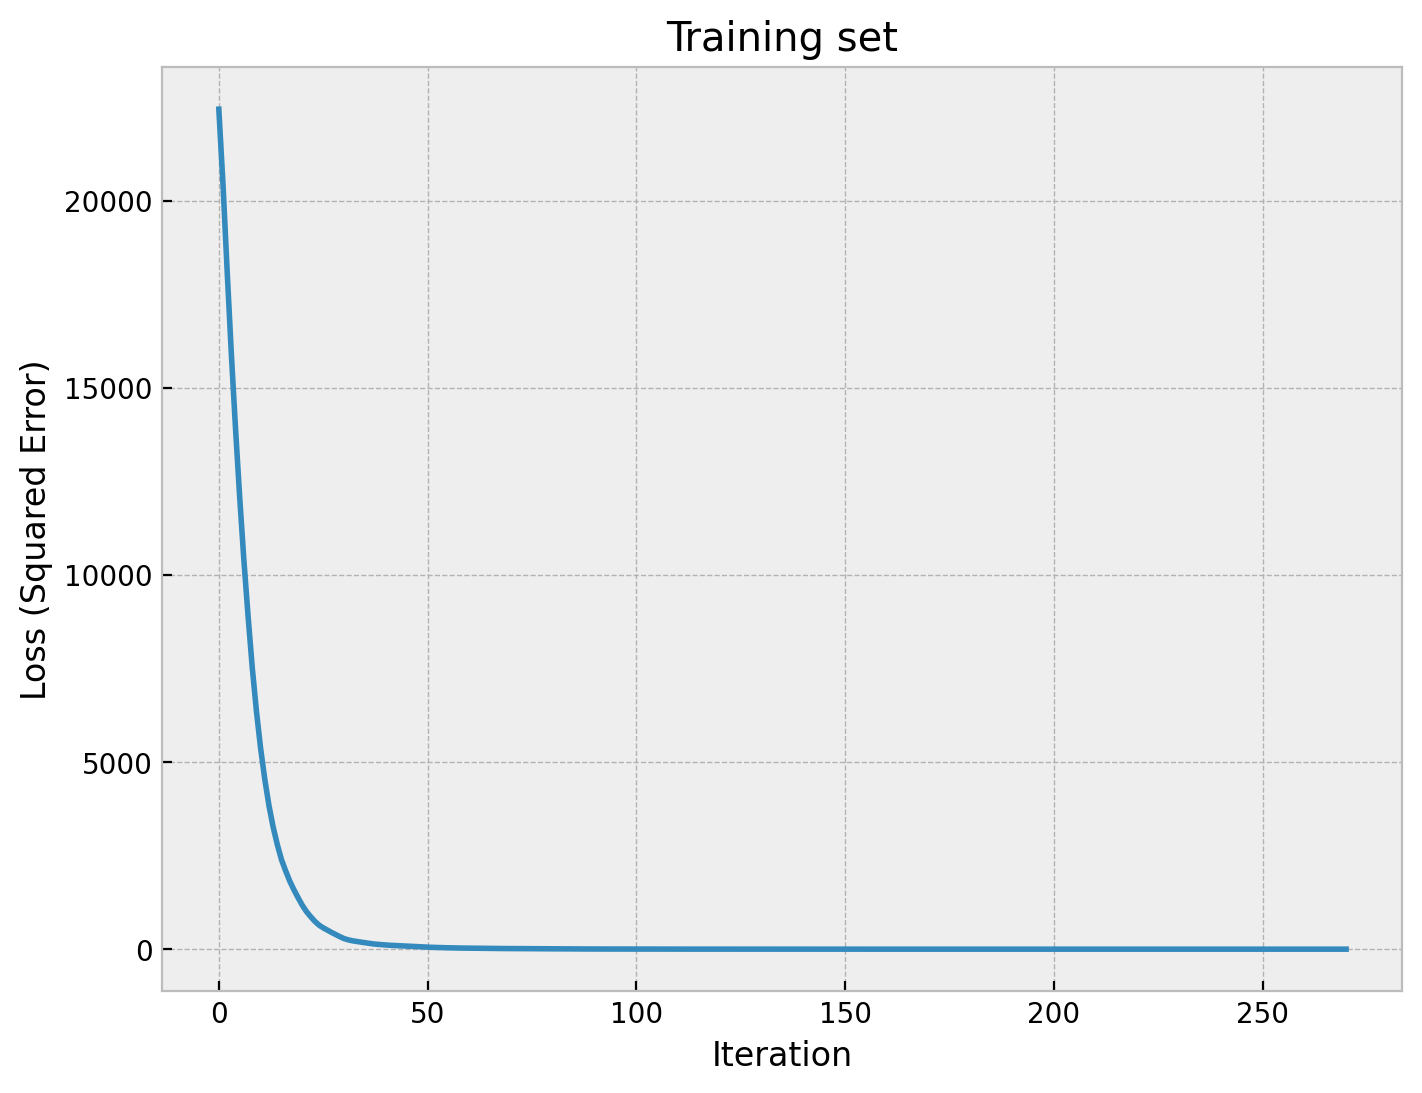

In [297]:
plt.plot(net_v1_1x100.loss_curve_)
plt.xlabel('Iteration')
plt.ylabel('Loss (Squared Error)')
plt.title('Training set');

Visualize the regression.

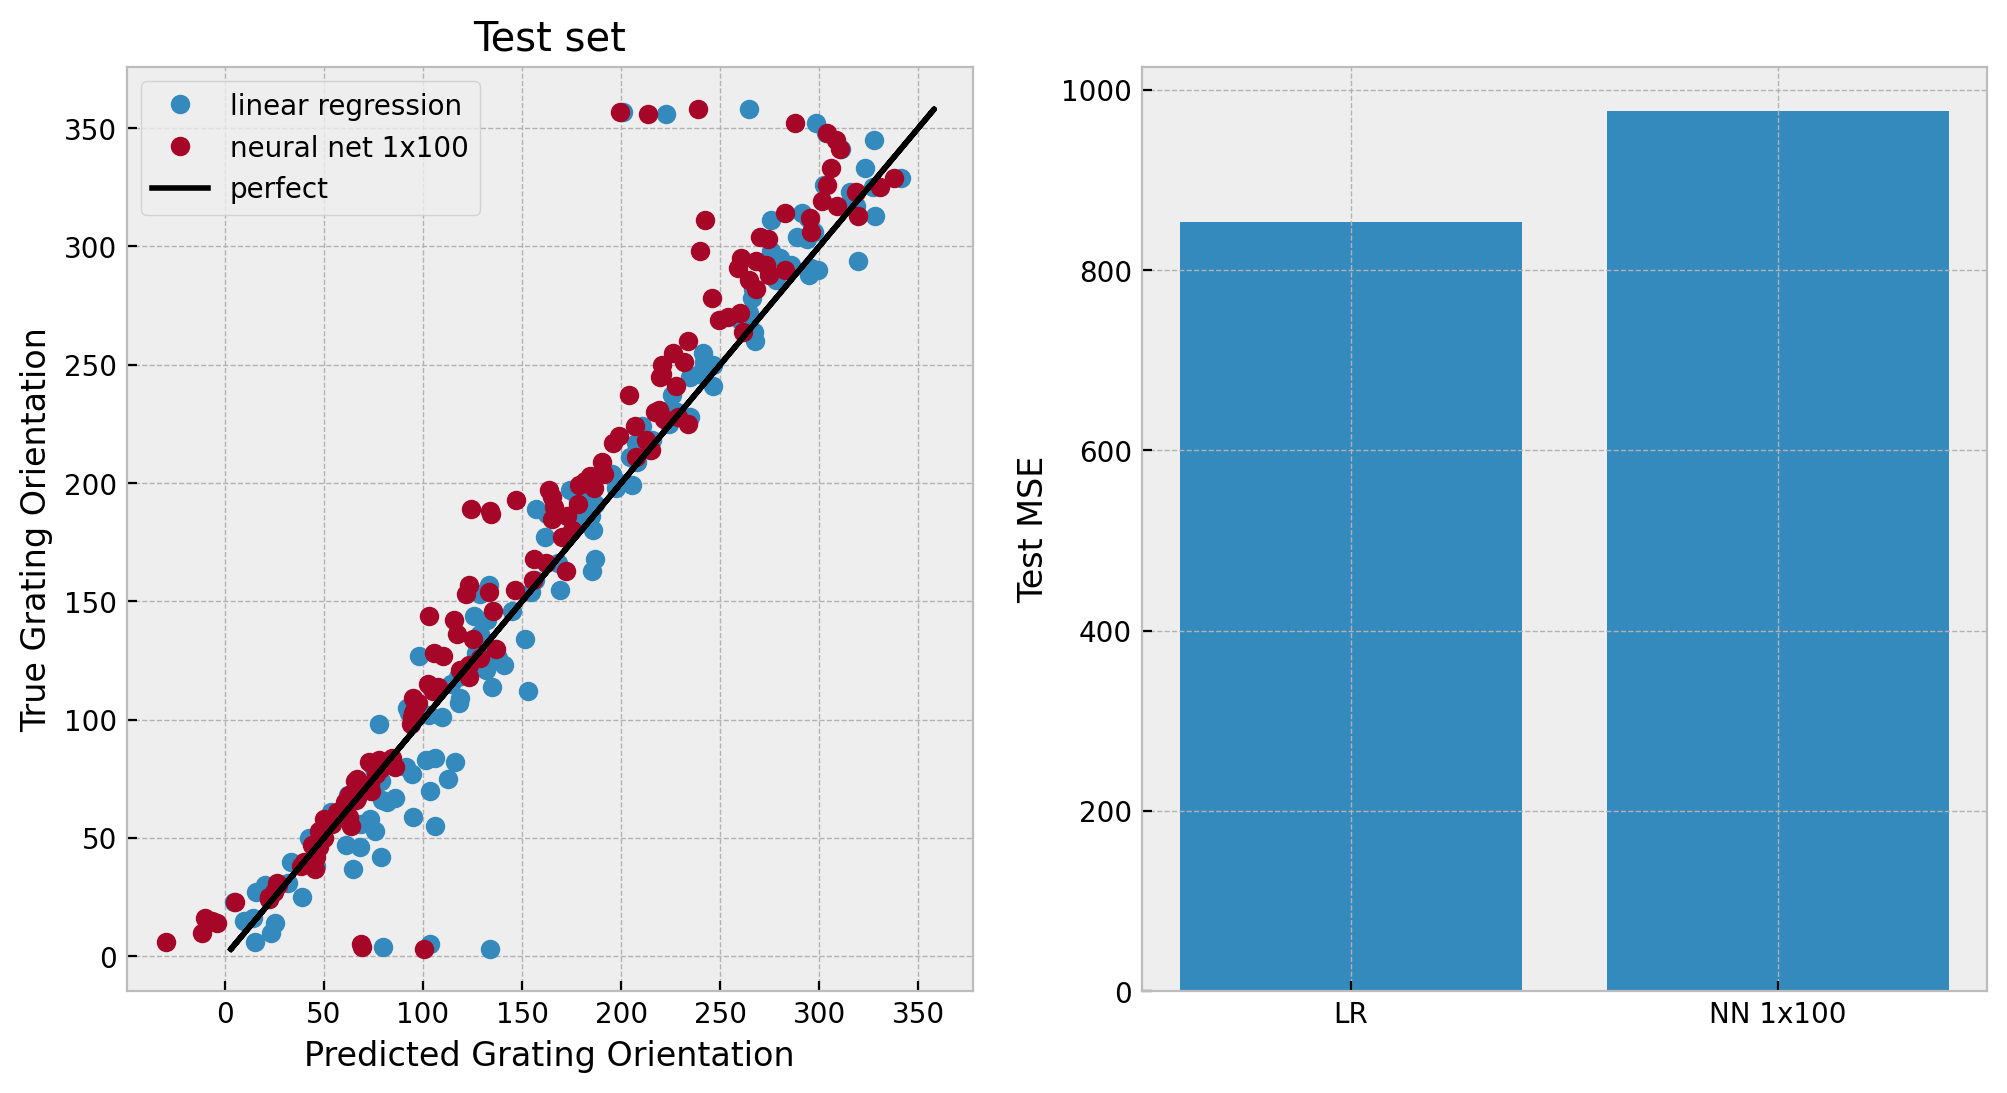

In [119]:
plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(lr_v1_test_pred, y_test, 'o', label='linear regression')
plt.plot(net_v1_1x100_test_pred, y_test, 'o', label='neural net 1x100')
plt.plot(y_test, y_test, 'k-', label='perfect')
plt.xlabel('Predicted Grating Orientation')
plt.ylabel('True Grating Orientation')
plt.title('Test set')
plt.legend();

plt.subplot(1, 2, 2)
plt.bar(['LR', 'NN 1x100'], [lr_v1_test_MSE, net_v1_1x100_test_MSE])
plt.ylabel('Test MSE');

What if we add more neurons?

In [121]:
# neural network
#   1 hidden layer of 1000 neurons
#   1 output layer for regression
net_v1_1x1000 = MLPRegressor(hidden_layer_sizes=[1000], random_state=1, max_iter=10000)

# train model on the training set
net_v1_1x1000.fit(X_train, y_train)

# eval model's test error
net_v1_1x1000_test_pred = net_v1_1x1000.predict(X_test)
net_v1_1x1000_test_MSE = mean_squared_error(y_test, net_v1_1x1000_test_pred)

Visualize the regression.

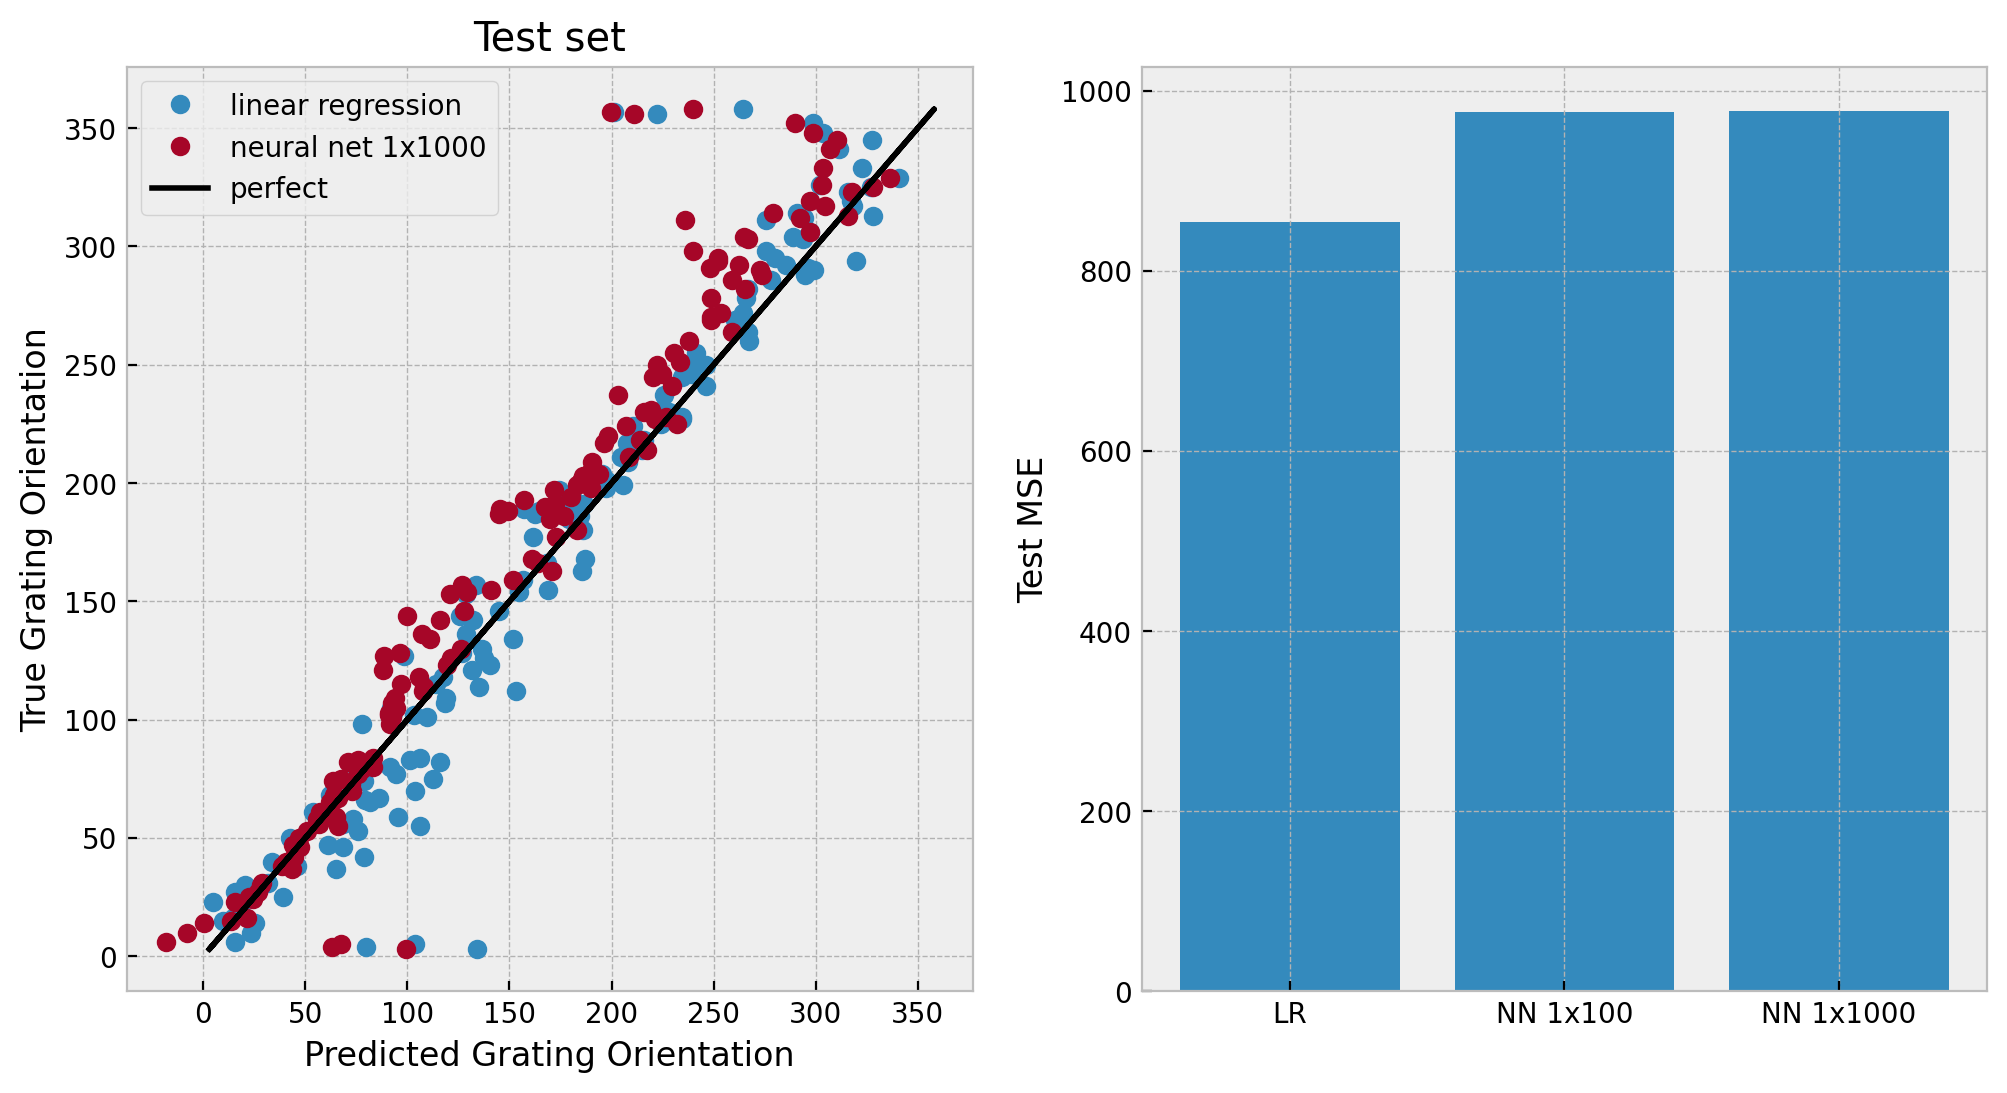

In [122]:
plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(lr_v1_test_pred, y_test, 'o', label='linear regression')
plt.plot(net_v1_1x1000_test_pred, y_test, 'o', label='neural net 1x1000')
plt.plot(y_test, y_test, 'k-', label='perfect')
plt.xlabel('Predicted Grating Orientation')
plt.ylabel('True Grating Orientation')
plt.title('Test set')
plt.legend();

plt.subplot(1, 2, 2)
plt.bar(['LR', 'NN 1x100', 'NN 1x1000'], [lr_v1_test_MSE, net_v1_1x100_test_MSE, net_v1_1x1000_test_MSE])
plt.ylabel('Test MSE');

### Exercise
Use a neural network with three hidden layers of 100 neurons to predict grating orientation based on neural activity in V1.

In [123]:
# # neural network
# #   3 hidden layers of 100 neurons
# #   1 output layer for regression
# net_v1_3x100 = MLPRegressor(hidden_layer_sizes=..., random_state=1, max_iter=10000)

# # train model on the training set
# net_v1_3x100.fit(X_train, y_train)

# # eval model's test error
# net_v1_3x100_test_pred = net_v1_3x100.predict(X_test)
# net_v1_3x100_test_MSE = mean_squared_error(y_test, net_v1_3x100_test_pred)

### Exercise key
Use a neural network with three hidden layers of 100 neurons to predict grating orientation based on neural activity in V1.

In [123]:
# neural network
#   3 hidden layers of 100 neurons
#   1 output layer for regression
net_v1_3x100 = MLPRegressor(hidden_layer_sizes=[100]*3, random_state=1, max_iter=10000)

# train model on the training set
net_v1_3x100.fit(X_train, y_train)

# eval model's test error
net_v1_3x100_test_pred = net_v1_3x100.predict(X_test)
net_v1_3x100_test_MSE = mean_squared_error(y_test, net_v1_3x100_test_pred)

Visualize the regression.

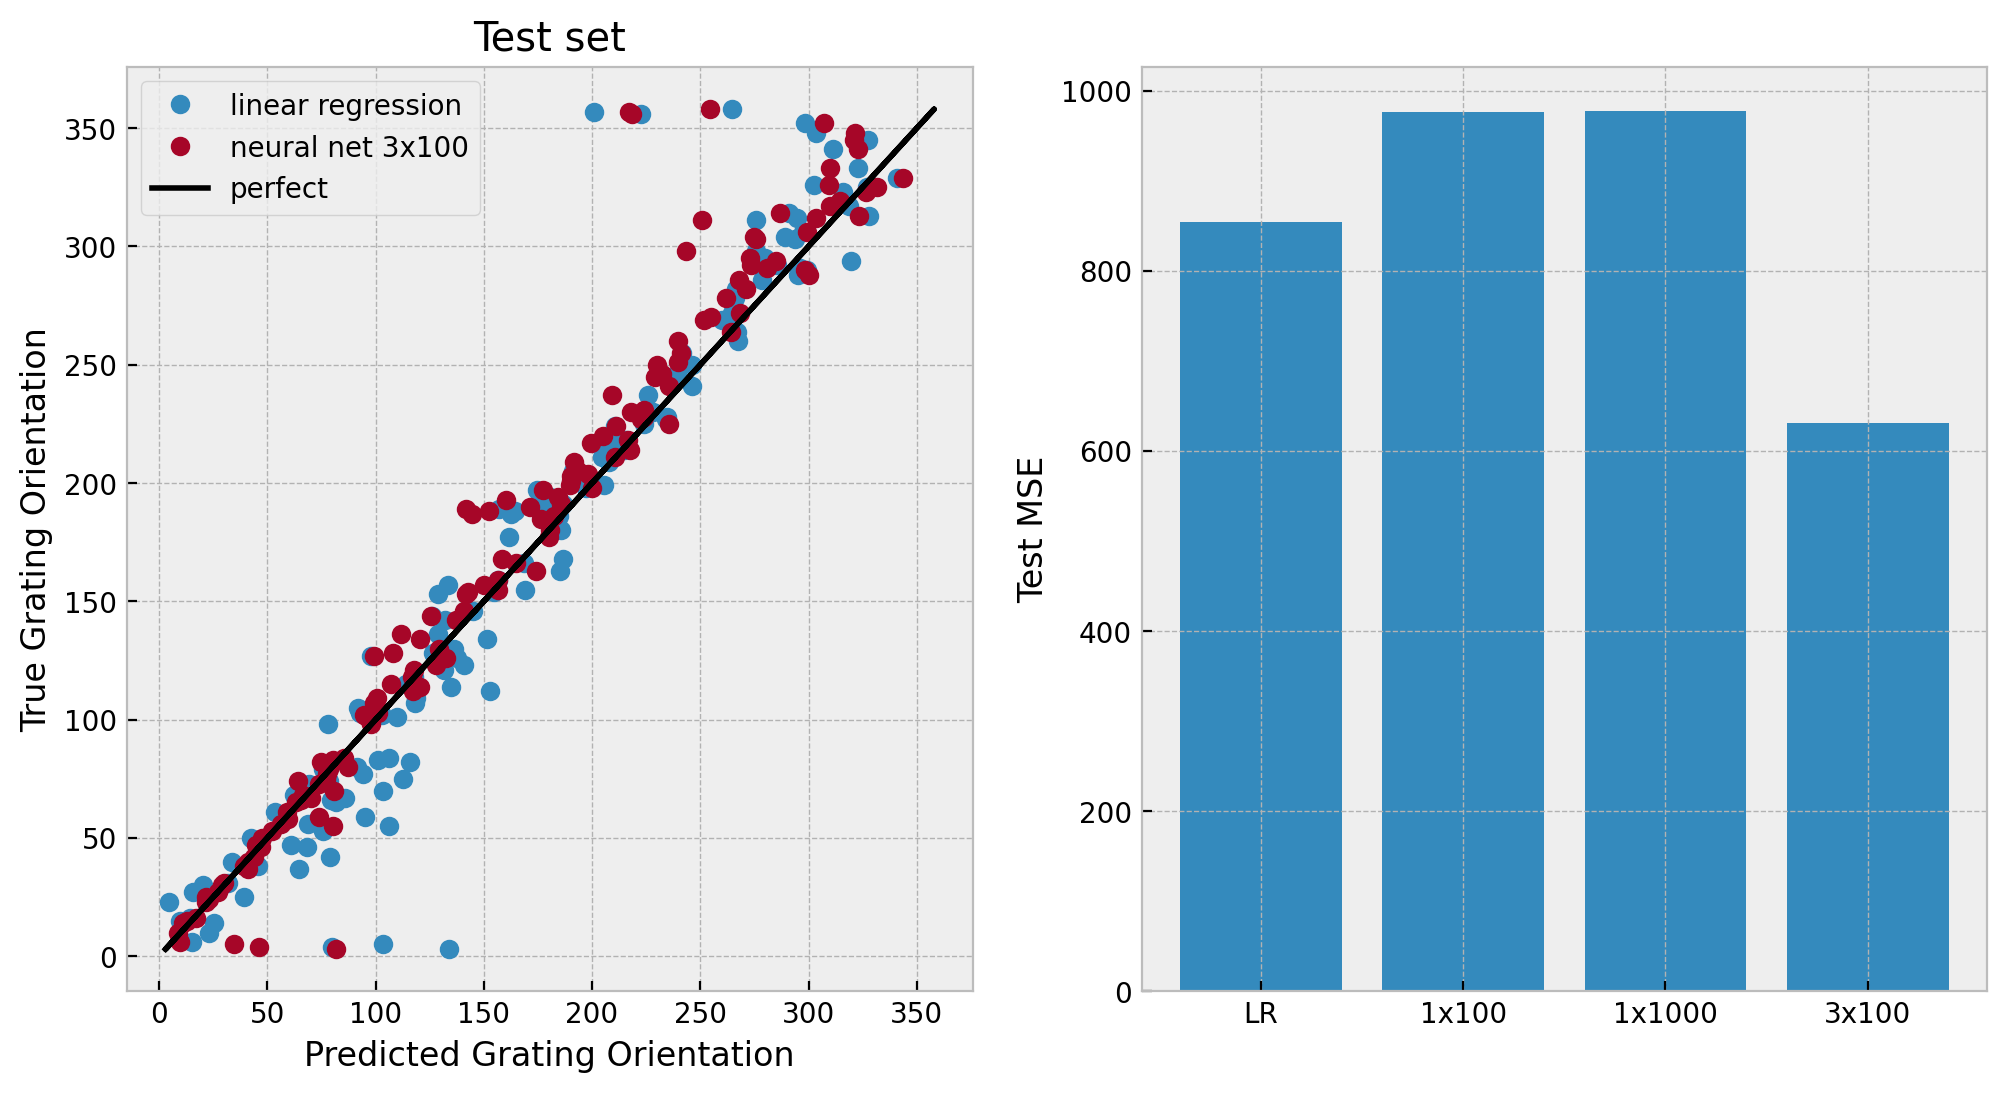

In [134]:
plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(lr_v1_test_pred, y_test, 'o', label='linear regression')
plt.plot(net_v1_3x100_test_pred, y_test, 'o', label='neural net 3x100')
plt.plot(y_test, y_test, 'k-', label='perfect')
plt.xlabel('Predicted Grating Orientation')
plt.ylabel('True Grating Orientation')
plt.title('Test set')
plt.legend();

plt.subplot(1, 2, 2)
plt.bar(['LR', '1x100', '1x1000', '3x100'], 
        [lr_v1_test_MSE, net_v1_1x100_test_MSE, net_v1_1x1000_test_MSE, net_v1_3x100_test_MSE])
plt.ylabel('Test MSE');

What if we add even more layers?

In [125]:
# neural network
#   10 hidden layers of 100 neurons
#   1 output layer for regression
net_v1_10x100 = MLPRegressor(hidden_layer_sizes=[100]*10, random_state=1, max_iter=10000)

# train model on the training set
net_v1_10x100.fit(X_train, y_train)

# eval model's test error
net_v1_10x100_test_pred = net_v1_10x100.predict(X_test)
net_v1_10x100_test_MSE = mean_squared_error(y_test, net_v1_10x100_test_pred)

Visualize the regression.

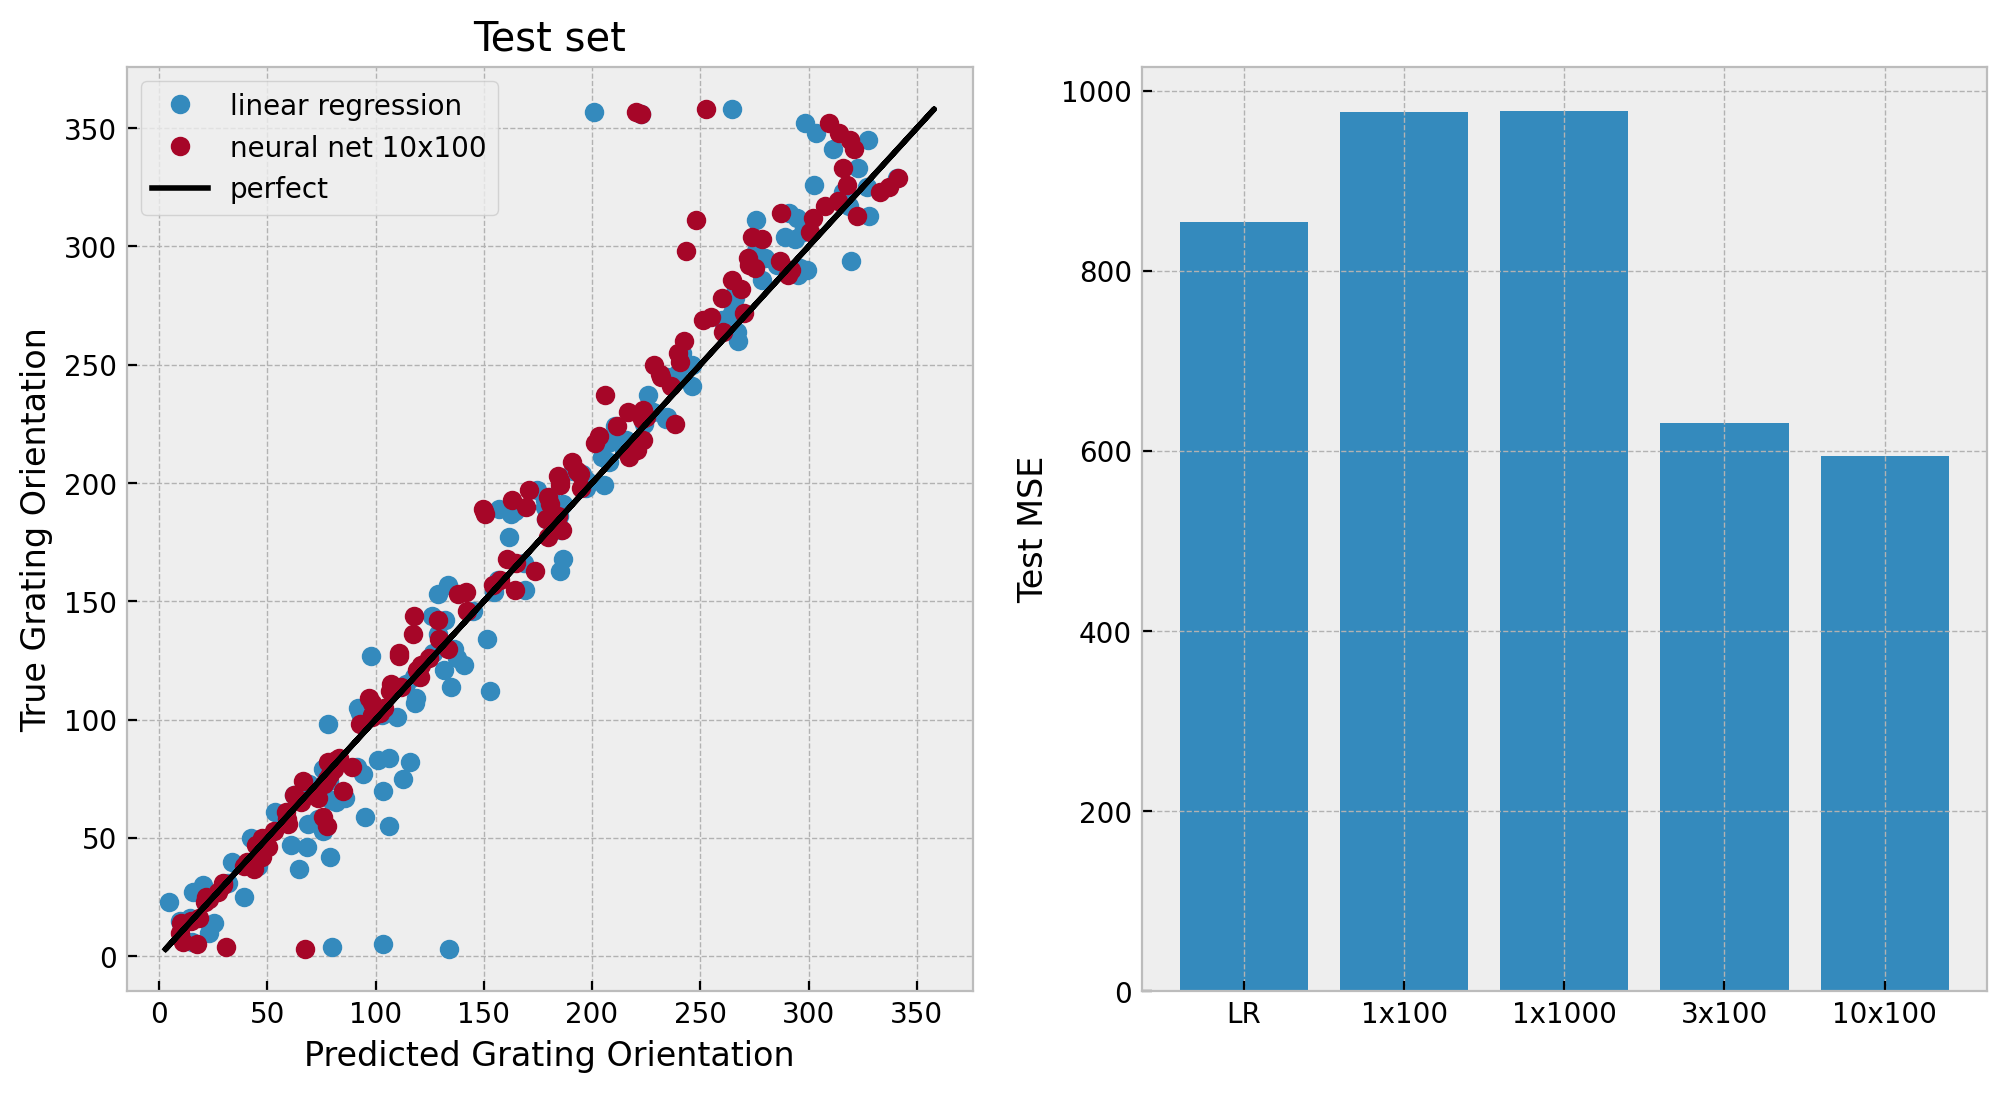

In [135]:
plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(lr_v1_test_pred, y_test, 'o', label='linear regression')
plt.plot(net_v1_10x100_test_pred, y_test, 'o', label='neural net 10x100')
plt.plot(y_test, y_test, 'k-', label='perfect')
plt.xlabel('Predicted Grating Orientation')
plt.ylabel('True Grating Orientation')
plt.title('Test set')
plt.legend();

plt.subplot(1, 2, 2)
plt.bar(['LR', '1x100', '1x1000', '3x100', '10x100'], 
        [lr_v1_test_MSE, net_v1_1x100_test_MSE, net_v1_1x1000_test_MSE, 
         net_v1_3x100_test_MSE, net_v1_10x100_test_MSE])
plt.ylabel('Test MSE');

One last attempt with multiple layers with more neurons?

In [127]:
# neural network
#   3 hidden layers of 300 neurons
#   1 output layer for regression
net_v1_3x300 = MLPRegressor(hidden_layer_sizes=[300]*3, random_state=1, max_iter=10000)

# train model on the training set
net_v1_3x300.fit(X_train, y_train)

# eval model's test error
net_v1_3x300_test_pred = net_v1_3x300.predict(X_test)
net_v1_3x300_test_MSE = mean_squared_error(y_test, net_v1_3x300_test_pred)

Visualize the regression.

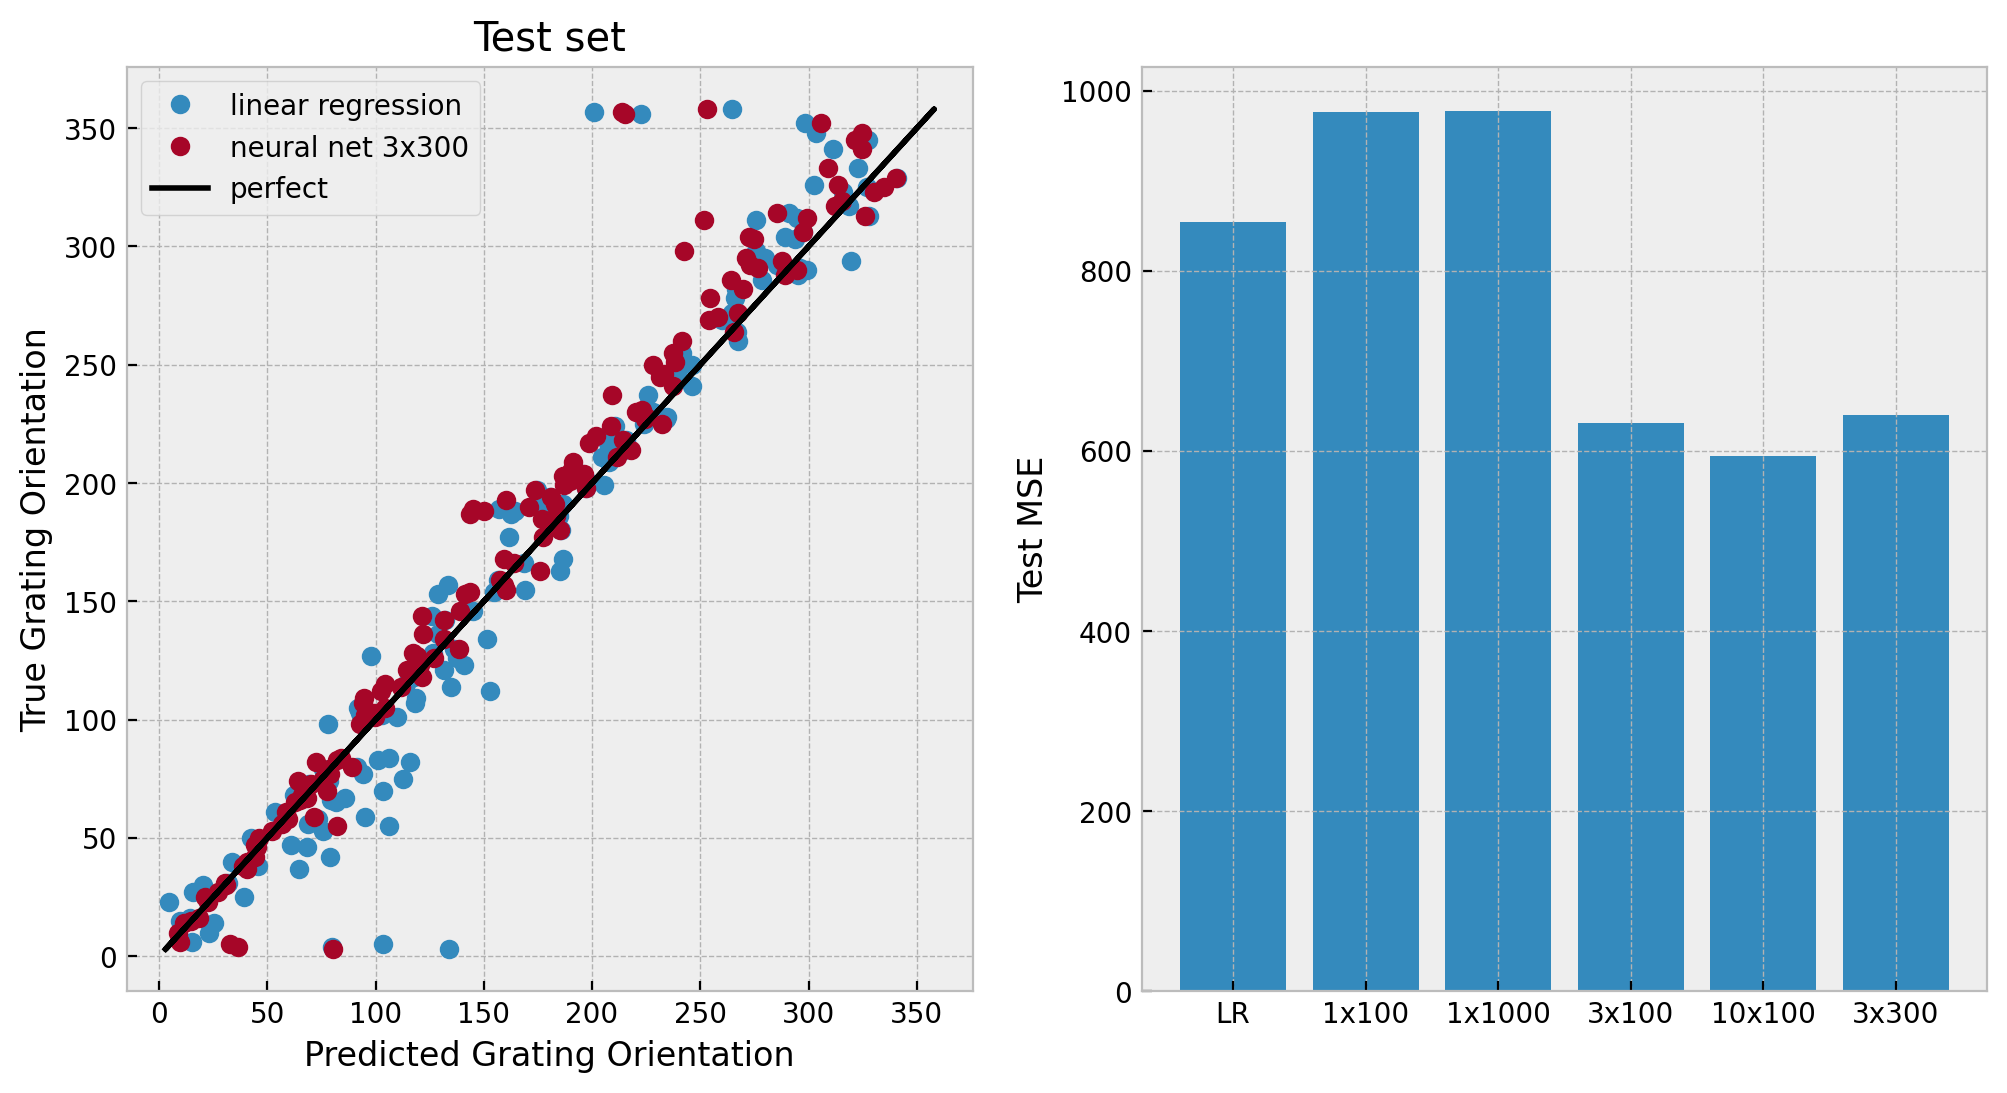

In [136]:
plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(lr_v1_test_pred, y_test, 'o', label='linear regression')
plt.plot(net_v1_3x300_test_pred, y_test, 'o', label='neural net 3x300')
plt.plot(y_test, y_test, 'k-', label='perfect')
plt.xlabel('Predicted Grating Orientation')
plt.ylabel('True Grating Orientation')
plt.title('Test set')
plt.legend();

plt.subplot(1, 2, 2)
plt.bar(['LR', '1x100', '1x1000', '3x100', '10x100', '3x300'], 
        [lr_v1_test_MSE, net_v1_1x100_test_MSE, net_v1_1x1000_test_MSE, 
         net_v1_3x100_test_MSE, net_v1_10x100_test_MSE, net_v1_3x300_test_MSE])
plt.ylabel('Test MSE');

We've actually been using L2 regularization for our neural networks the whole time. See the `alpha` parameter in the docs: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

Since we didn't do any regularization for the linear model (that would be a Ridge regularization model), let's remove the regularization to compare apples to apples.

In [156]:
# neural network without L2 regularization (alpha=0)
#   3 hidden layers of 100 neurons
#   1 output layer for regression
net_v1_3x100_noreg = MLPRegressor(hidden_layer_sizes=[100]*3, random_state=1, max_iter=10000, alpha=0)

# train model on the training set
net_v1_3x100_noreg.fit(X_train, y_train)

# eval model's test error
net_v1_3x100_noreg_test_pred = net_v1_3x100_noreg.predict(X_test)
net_v1_3x100_noreg_test_MSE = mean_squared_error(y_test, net_v1_3x100_noreg_test_pred)

In this case, the default regularization did not make much difference.

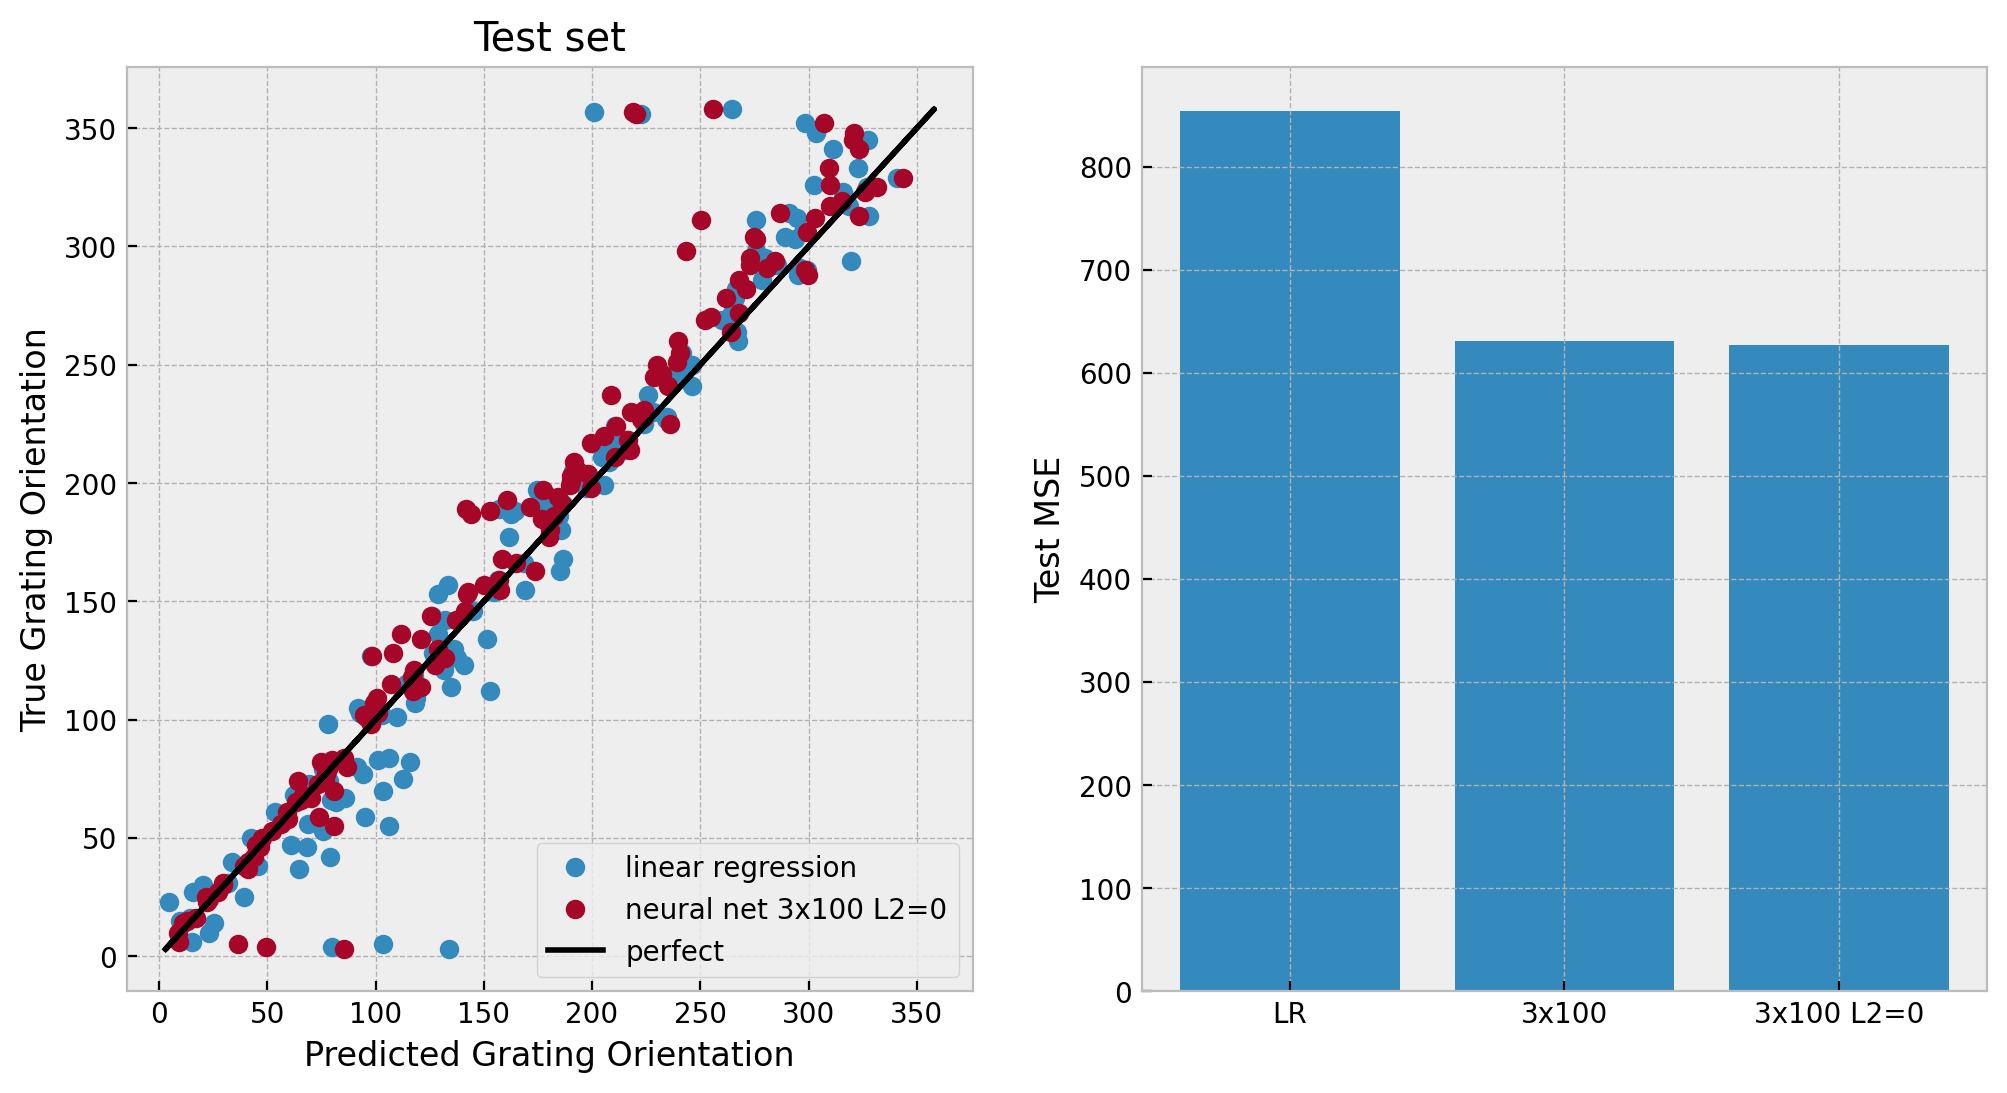

In [157]:
plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(lr_v1_test_pred, y_test, 'o', label='linear regression')
plt.plot(net_v1_3x100_noreg_test_pred, y_test, 'o', label='neural net 3x100 L2=0')
plt.plot(y_test, y_test, 'k-', label='perfect')
plt.xlabel('Predicted Grating Orientation')
plt.ylabel('True Grating Orientation')
plt.title('Test set')
plt.legend();

plt.subplot(1, 2, 2)
plt.bar(['LR', '3x100', '3x100 L2=0'], 
        [lr_v1_test_MSE, net_v1_3x100_test_MSE, net_v1_3x100_noreg_test_MSE])
plt.ylabel('Test MSE');

### Mouse choice task

Consider the following task from [Steinmetz et al. (2019)](https://www.nature.com/articles/s41586-019-1787-x): For a repeated series of trials, a mouse is trained to rotate a wheel to indicate whether it perceives a Gabor pattern to the left or right. Spike rates from many cortical neurons are recorded on each trial. The goal is to build a model that can predict the mouse's choice based on the spiking of its cortical neurons.

![](images/gabor.png)

Adapted from [Neuromatch Academy](https://compneuro.neuromatch.io/tutorials/W1D4_GeneralizedLinearModels/student/W1D4_Tutorial2.html)

Load the data:

* `choices`: mouse chooses whether a Gabor stimulus is to the left or right on each of 276 trials 
* `spikes`: normalized spike rates for each of 691 neurons across the cortex recorded with Neuropixel probes on each trial

In [180]:
spikes = np.load('data/mouse_cortical_spiking.npy')
choices = np.load('data/mouse_left_right_choices.npy')

spikes.shape, choices.shape

((276, 691), (276,))

In [181]:
# 0 = left, 1 = right
choices[:9]

array([1., 1., 0., 0., 0., 0., 1., 0., 0.])

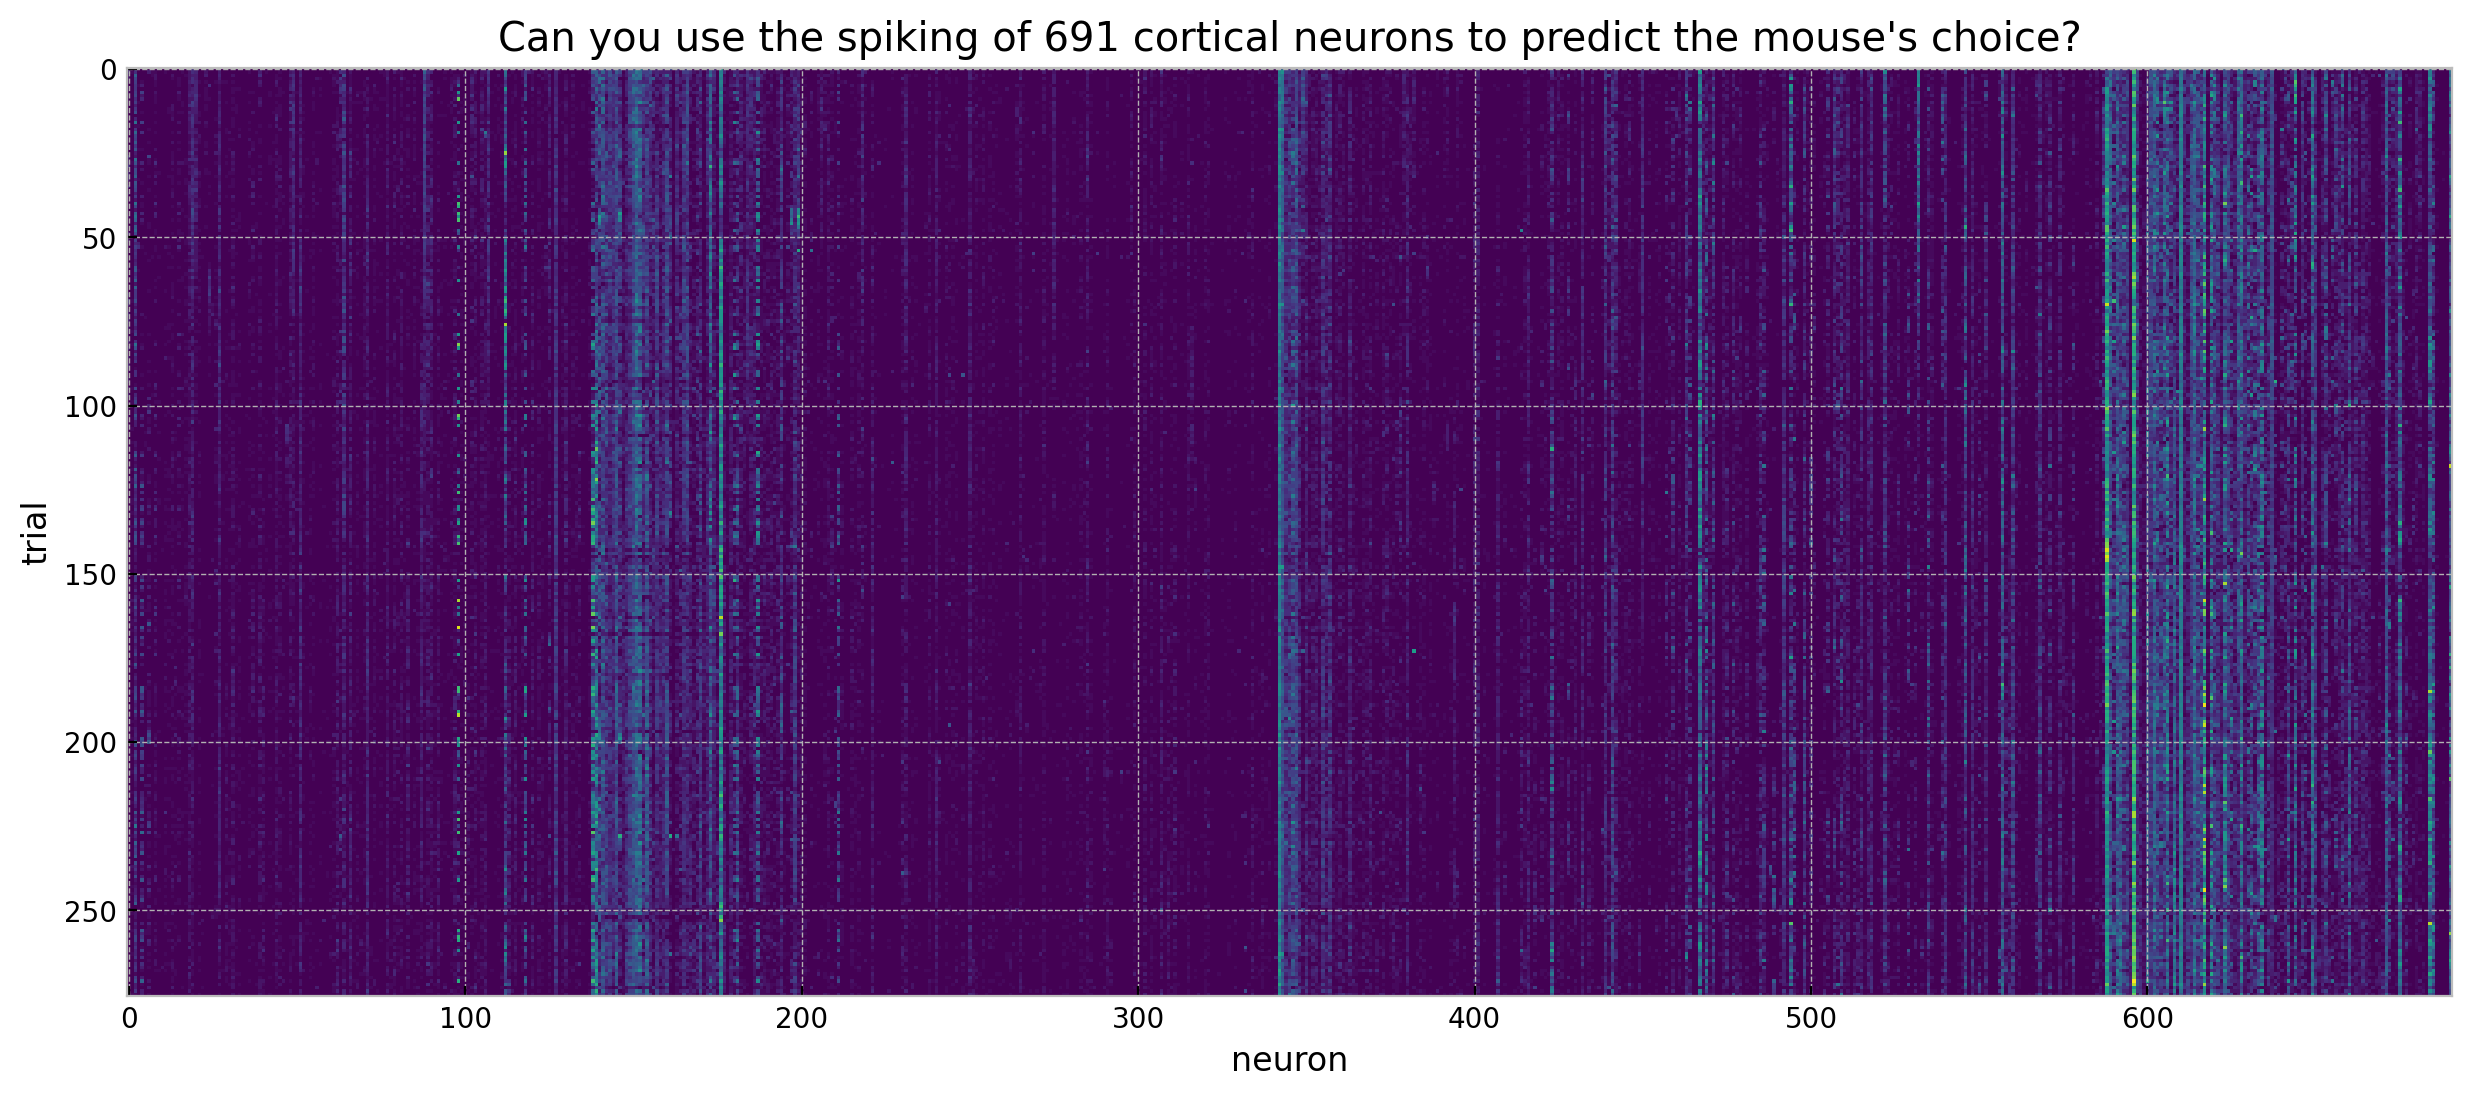

In [185]:
plt.figure(figsize=[15,8])
plt.imshow(spikes)
plt.xlabel('neuron')
plt.ylabel('trial')
plt.title("Can you use the spiking of 691 cortical neurons to predict the mouse's choice?");

### Question?

If your goal is to predict left/right choice based on neural activity in cortex, what type of analysis will you do?

- Regression
- Classification
- Clustering
- Dimensionality reduction

Split the data into training and testing sets.

In [225]:
X = spikes
y = choices

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.3, random_state=3)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((193, 691), (83, 691), (193,), (83,))

### Exercise
Use a logistic regression model to predict the mouse's left/right choice based on its cortical neural activity.

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score

# # train a logistic regression model on the training set
# logr_model = ...
# ...

# # eval model's test accuracy
# logr_test_pred = ...
# logr_test_accuracy = accuracy_score(y_test, logr_test_pred)
# logr_test_accuracy

### Exercise key
Use a logistic regression model to predict the mouse's left/right choice based on its cortical neural activity.

In [189]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# train a logistic regression model on the training set
logr_model = LogisticRegression()
logr_model.fit(X_train, y_train)

# eval model's test accuracy
logr_test_pred = logr_model.predict(X_test)
logr_test_accuracy = accuracy_score(y_test, logr_test_pred)
logr_test_accuracy

0.9036144578313253

[sklearn.neural_network.MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)

In [226]:
from sklearn.neural_network import MLPClassifier

# neural network
#   1 hidden layer of 100 neurons
#   output layer will have as many neurons as classes for classification
netc_1x100 = MLPClassifier(hidden_layer_sizes=[100], random_state=1, max_iter=10000)

# train model on the training set
netc_1x100.fit(X_train, y_train)

# eval model's test accuracy
netc_1x100_test_pred = netc_1x100.predict(X_test)
netc_1x100_test_accuracy = accuracy_score(y_test, netc_1x100_test_pred)
netc_1x100_test_accuracy

0.9036144578313253

Visualize the training of the neural network.

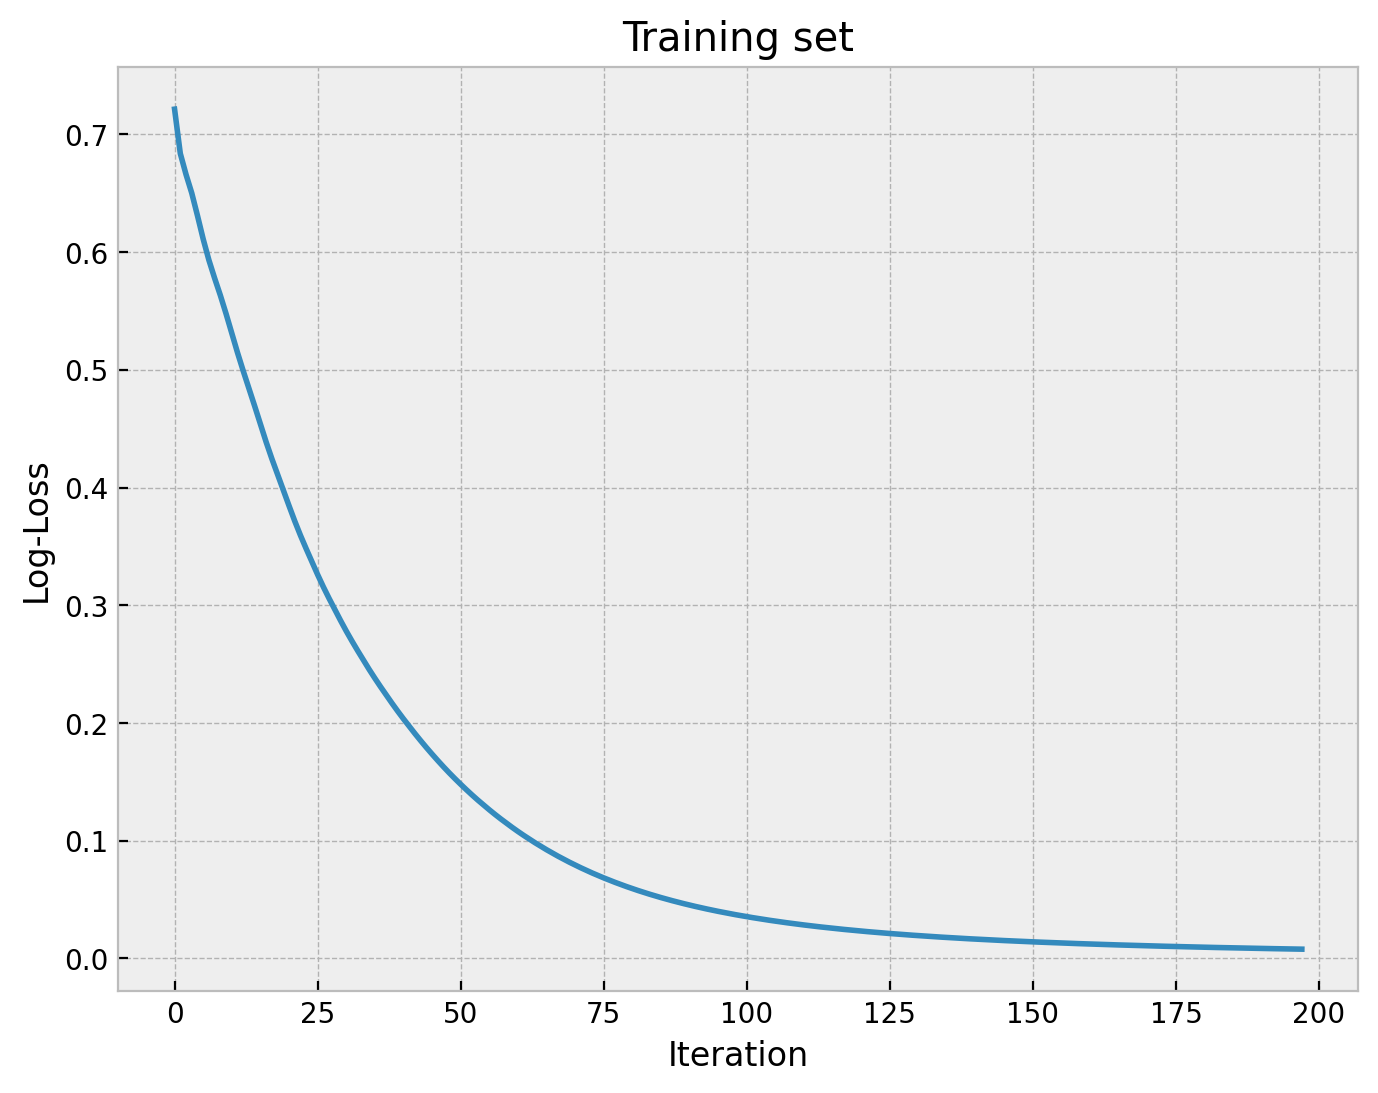

In [300]:
plt.plot(netc_1x100.loss_curve_)
plt.xlabel('Iteration')
plt.ylabel('Log-Loss')
plt.title('Training set');

Compare the accuracy of the neural network with a simple logistic regression classifier.

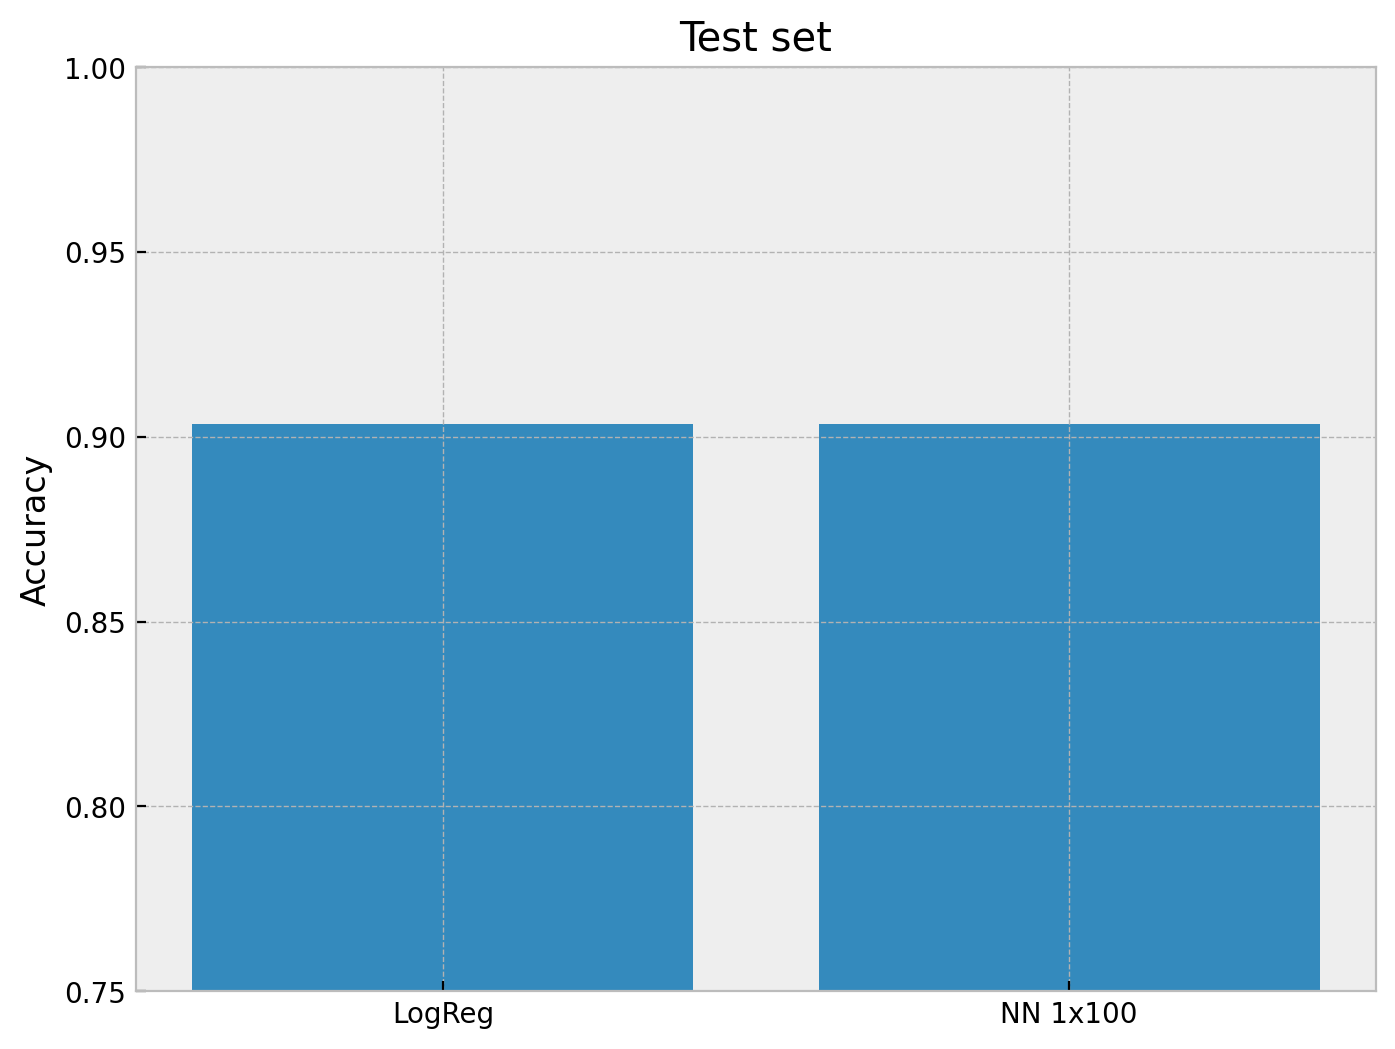

In [233]:
plt.bar(['LogReg', 'NN 1x100'], [logr_test_accuracy, netc_1x100_test_accuracy])
plt.ylabel('Accuracy')
plt.title('Test set')
plt.ylim([0.75, 1]);

### Exercise
Use a neural network with 5 hidden layers having 100, 100, 30, 30, and 10 neurons to predict the mouse's left/right choice based on its cortical neural activity.

In [ ]:
# # neural network
# #   5 hidden layers of 100, 100, 30, 30, 10 neurons
# #   output layer will have 2 neurons for binary classification
# netc5 = ...

# # train model on the training set
# ...

# # eval model's test accuracy
# netc5_test_pred = ...
# netc5_test_accuracy = accuracy_score(y_test, netc5_test_pred)
# netc5_test_accuracy

### Exercise key
Use a neural network with 5 hidden layers having 100, 100, 30, 30, and 10 neurons to predict the mouse's left/right choice based on its cortical neural activity.

In [228]:
# neural network
#   5 hidden layers of 100, 100, 30, 30, 10 neurons
#   output layer will have 2 neurons for binary classification
netc5 = MLPClassifier(hidden_layer_sizes=[100, 100, 30, 30, 10], random_state=1, max_iter=10000)

# train model on the training set
netc5.fit(X_train, y_train)

# eval model's test accuracy
netc5_test_pred = netc5.predict(X_test)
netc5_test_accuracy = accuracy_score(y_test, netc5_test_pred)
netc5_test_accuracy

0.9397590361445783

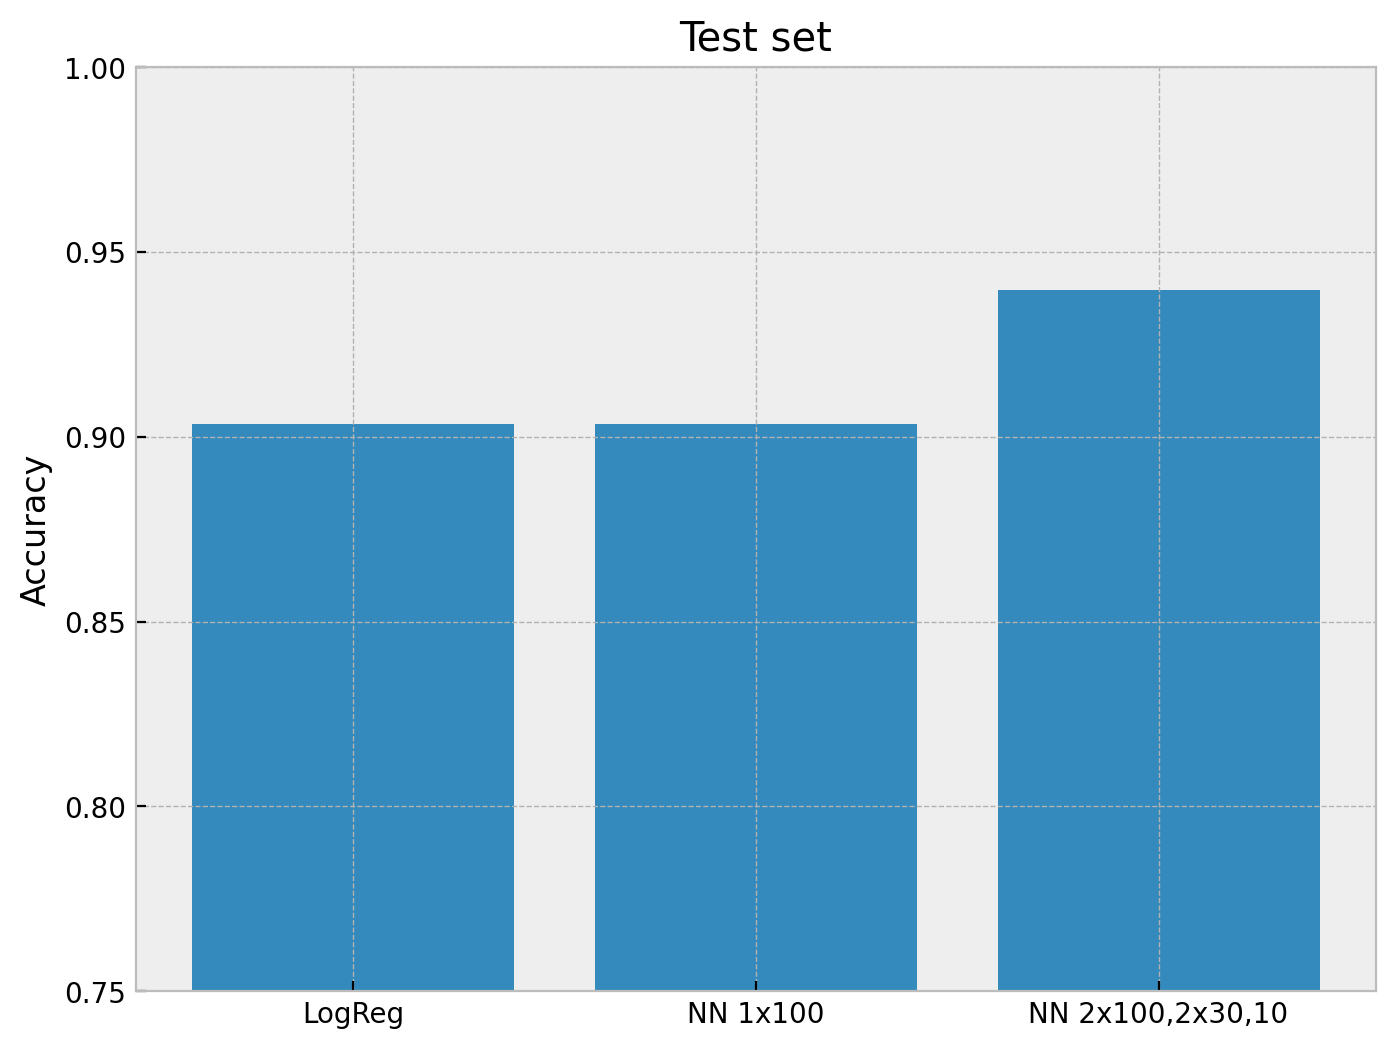

In [231]:
plt.bar(['LogReg', 'NN 1x100', 'NN 2x100,2x30,10'], 
        [logr_test_accuracy, netc_1x100_test_accuracy, netc5_test_accuracy])
plt.ylabel('Accuracy')
plt.title('Test set')
plt.ylim([0.75, 1]);

Compare with a support vector machine classifier.

In [213]:
from sklearn.svm import SVC

# support vector machine classifier with radial basis function kernel
svm = SVC(kernel='rbf')

# train model on the training set
svm.fit(X_train, y_train)

# eval model's test accuracy
svm_test_pred = svm.predict(X_test)
svm_test_accuracy = accuracy_score(y_test, svm_test_pred)
svm_test_accuracy

0.927710843373494

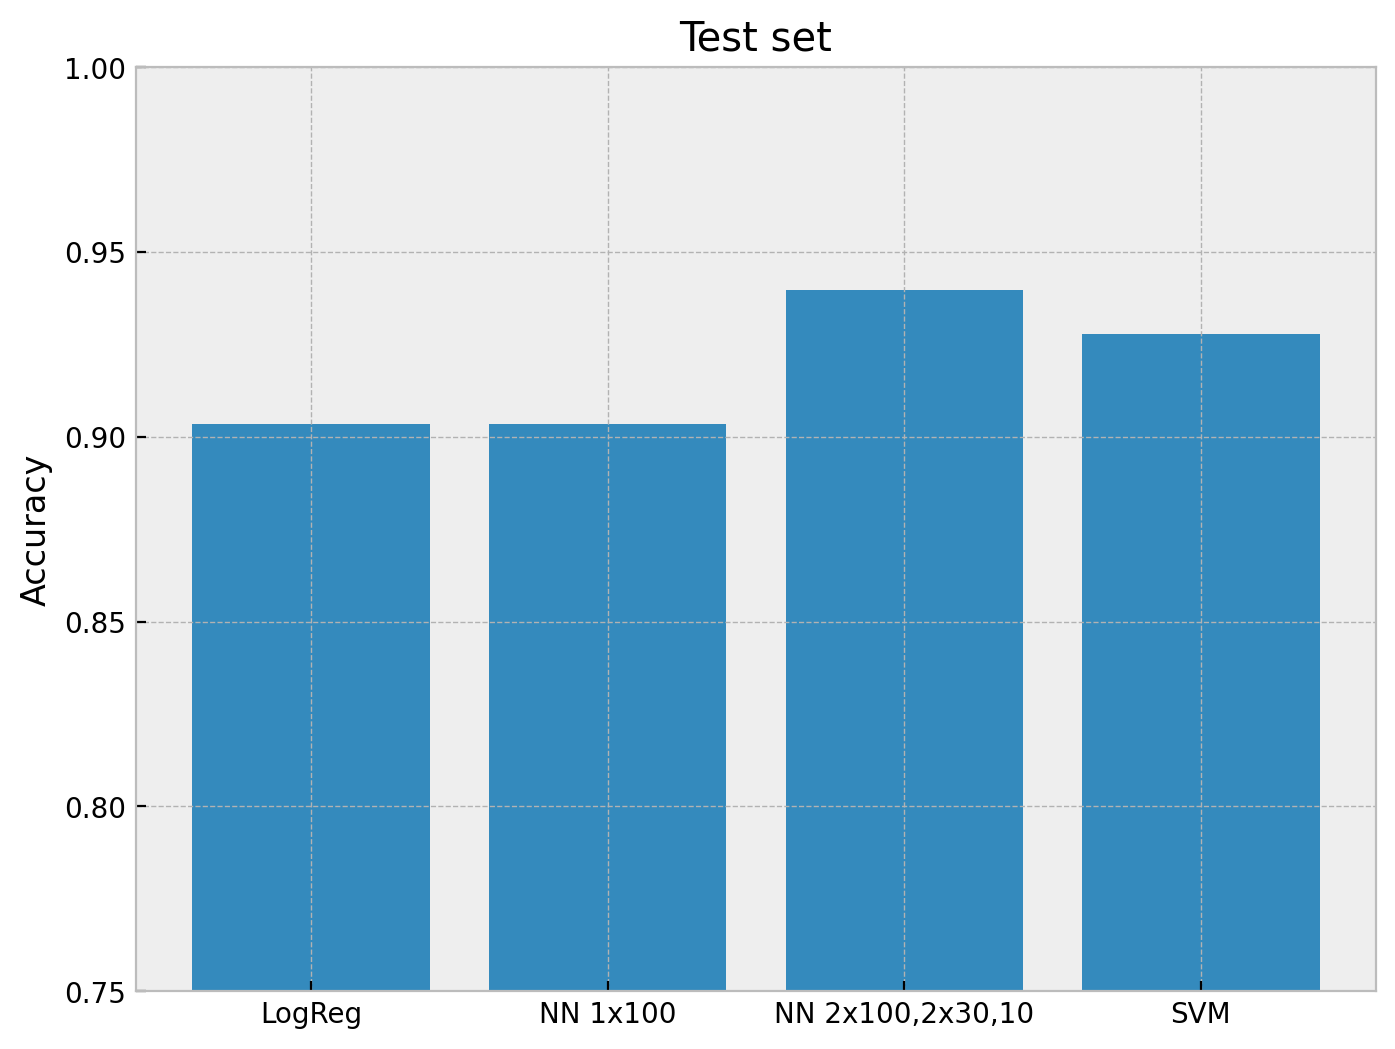

In [232]:
plt.bar(['LogReg', 'NN 1x100', 'NN 2x100,2x30,10', 'SVM'], 
        [logr_test_accuracy, netc_1x100_test_accuracy, netc5_test_accuracy,
        svm_test_accuracy])
plt.ylabel('Accuracy')
plt.title('Test set')
plt.ylim([0.75, 1]);

Just like many of the other methods we have discussed in this class, neural networks have hyperparameters that can be tuned to optimize the model.

For example, let's consider regularization for the neural network weights.

In [234]:
from sklearn.model_selection import GridSearchCV

# try these values for the L2 penalty alpha
params = {'alpha': np.logspace(-5, -1, 30)}

# grid search cross validation to find best params
netc5_search = GridSearchCV(netc5, params, cv=5, scoring='accuracy')
netc5_search.fit(X_train, y_train)

netc5_search.best_estimator_

MLPClassifier(alpha=0.0030391953823131978,
              hidden_layer_sizes=[100, 100, 30, 30, 10], max_iter=10000,
              random_state=1)

Let's also optimize the missclassification penalty for our SVM classifer.

In [214]:
from sklearn.model_selection import GridSearchCV

# try these values for the penalty C
params = {'C': np.logspace(-1, 2, 30)}

# grid search cross validation to find best params
svm_search = GridSearchCV(svm, params, cv=5, scoring='accuracy')
svm_search.fit(X_train, y_train)

svm_search.best_estimator_

SVC(C=1.743328822199988)

Now retrain the models using the optimized hyperparameters.

In [236]:
# models with optimized regularization or misclassification penalty
netc5_reg = netc5_search.best_estimator_
svm_reg = svm_search.best_estimator_

# train models on the training set
netc5_reg.fit(X_train, y_train)
svm_reg.fit(X_train, y_train)

# eval models test accuracy
netc5_reg_test_pred = netc5_reg.predict(X_test)
svm_reg_test_pred = svm_reg.predict(X_test)

netc5_reg_test_accuracy = accuracy_score(y_test, netc5_reg_test_pred)
svm_reg_test_accuracy = accuracy_score(y_test, svm_reg_test_pred)

Did optimizing those hyperparameters help?

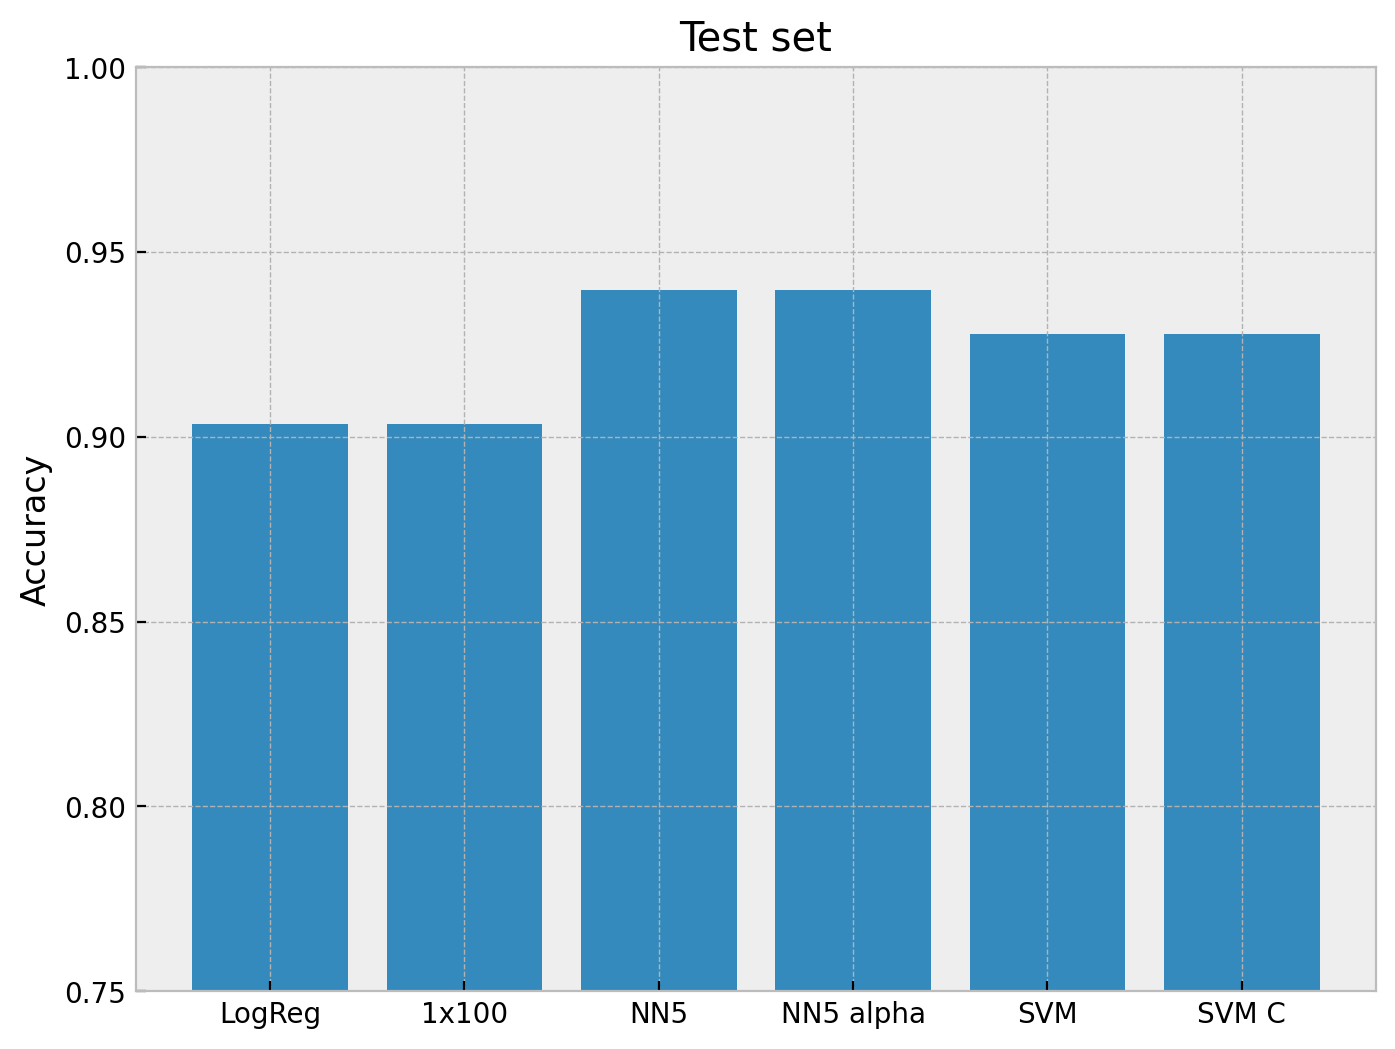

In [269]:
plt.bar(['LogReg', '1x100', 'NN5', 'NN5 alpha', 'SVM', 'SVM C'], 
        [logr_test_accuracy, netc_1x100_test_accuracy, 
         netc5_test_accuracy, netc5_reg_test_accuracy,
        svm_test_accuracy, svm_reg_test_accuracy])
plt.ylabel('Accuracy')
plt.title('Test set')
plt.ylim([0.75, 1]);

# Expression levels of 77 proteins measured in the cerebral cortex of 8 classes of control and Down syndrome (Ts65Dn) mice exposed to context fear conditioning.

![Data_Cortex_Nuclear](images/mice-protein-expression.png)

https://www.kaggle.com/ruslankl/mice-protein-expression

In [238]:
import pandas as pd
mice = pd.read_csv('data/Data_Cortex_Nuclear.csv')
mice

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0        309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1        309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2        309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3        309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4        309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   
...        ...       ...       ...       ...       ...       ...       ...   
1075  J3295_11  0.254860  0.463591  0.254860  2.092082  2.600035  0.211736   
1076  J3295_12  0.272198  0.474163  0.251638  2.161390  2.801492  0.251274   
1077  J3295_13  0.228700  0.395179  0.234118  1.733184  2.220852  0.220665   
1078  J3295_14  0.221242  0.412894  0.243974  1.876347  2.384088  0.208897   
1079  J3295_15  0.302626  0.461059  0.256564  2.092790  2.594348  0.251001   

       pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0     0.177565   2.373744  0.232224  ...  0.108336  0.427099   0.114783   
1     0.172817   2.292150  0.226972  ...  0.104315  0.441581   0.111974   
2     0.175722   2.283337  0.230247  ...  0.106219  0.435777   0.111883   
3     0.176463   2.152301  0.207004  ...  0.111262  0.391691   0.130405   
4     0.173627   2.134014  0.192158  ...  0.110694  0.434154   0.118481   
...        ...        ...       ...  ...       ...       ...        ...   
1075  0.171262   2.483740  0.207317  ...  0.183324  0.374088   0.318782   
1076  0.182496   2.512737  0.216339  ...  0.175674  0.375259   0.325639   
1077  0.161435   1.989723  0.185164  ...  0.158296  0.422121   0.321306   
1078  0.173623   2.086028  0.192044  ...  0.196296  0.397676   0.335936   
1079  0.191811   2.361816  0.223632  ...  0.187556  0.420347   0.335062   

        EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
0     0.131790  0.128186  1.675652   Control  Memantine       C/S  c-CS-m  
1     0.135103  0.131119  1.743610   Control  Memantine       C/S  c-CS-m  
2     0.133362  0.127431  1.926427   Control  Memantine       C/S  c-CS-m  
3     0.147444  0.146901  1.700563   Control  Memantine       C/S  c-CS-m  
4     0.140314  0.148380  1.839730   Control  Memantine       C/S  c-CS-m  
...        ...       ...       ...       ...        ...       ...     ...  
1075  0.204660  0.328327  1.364823    Ts65Dn     Saline       S/C  t-SC-s  
1076  0.200415  0.293435  1.364478    Ts65Dn     Saline       S/C  t-SC-s  
1077  0.229193  0.355213  1.430825    Ts65Dn     Saline       S/C  t-SC-s  
1078  0.251317  0.365353  1.404031    Ts65Dn     Saline       S/C  t-SC-s  
1079  0.252995  0.365278  1.370999    Ts65Dn     Saline       S/C  t-SC-s  

[1080 rows x 82 columns]

Goal is to use protein expression levels to classify mice. Each mouse in the dataset belongs to one of the following eight classes:

1. c-CS-s: control mice,  stimulated to learn,      injected with saline
2. c-CS-m: control mice,  stimulated to learn,      injected with memantine
3. c-SC-s: control mice,  not stimulated to learn,  injected with saline
4. c-SC-m: control mice,  not stimulated to learn,  injected with memantine
5. t-CS-s: trisomy mice,  stimulated to learn,      injected with saline
6. t-CS-m: trisomy mice,  stimulated to learn,      injected with memantine
7. t-SC-s: trisomy mice,  not stimulated to learn,  injected with saline
8. t-SC-m: trisomy mice,  not stimulated to learn,  injected with memantine

which are combinations of:

* Control vs. down syndrome.
* Did or did not recieve behavioral conditioning.
* Saline vs. memantine injection.

First, throw out features and data points with missing measurements.

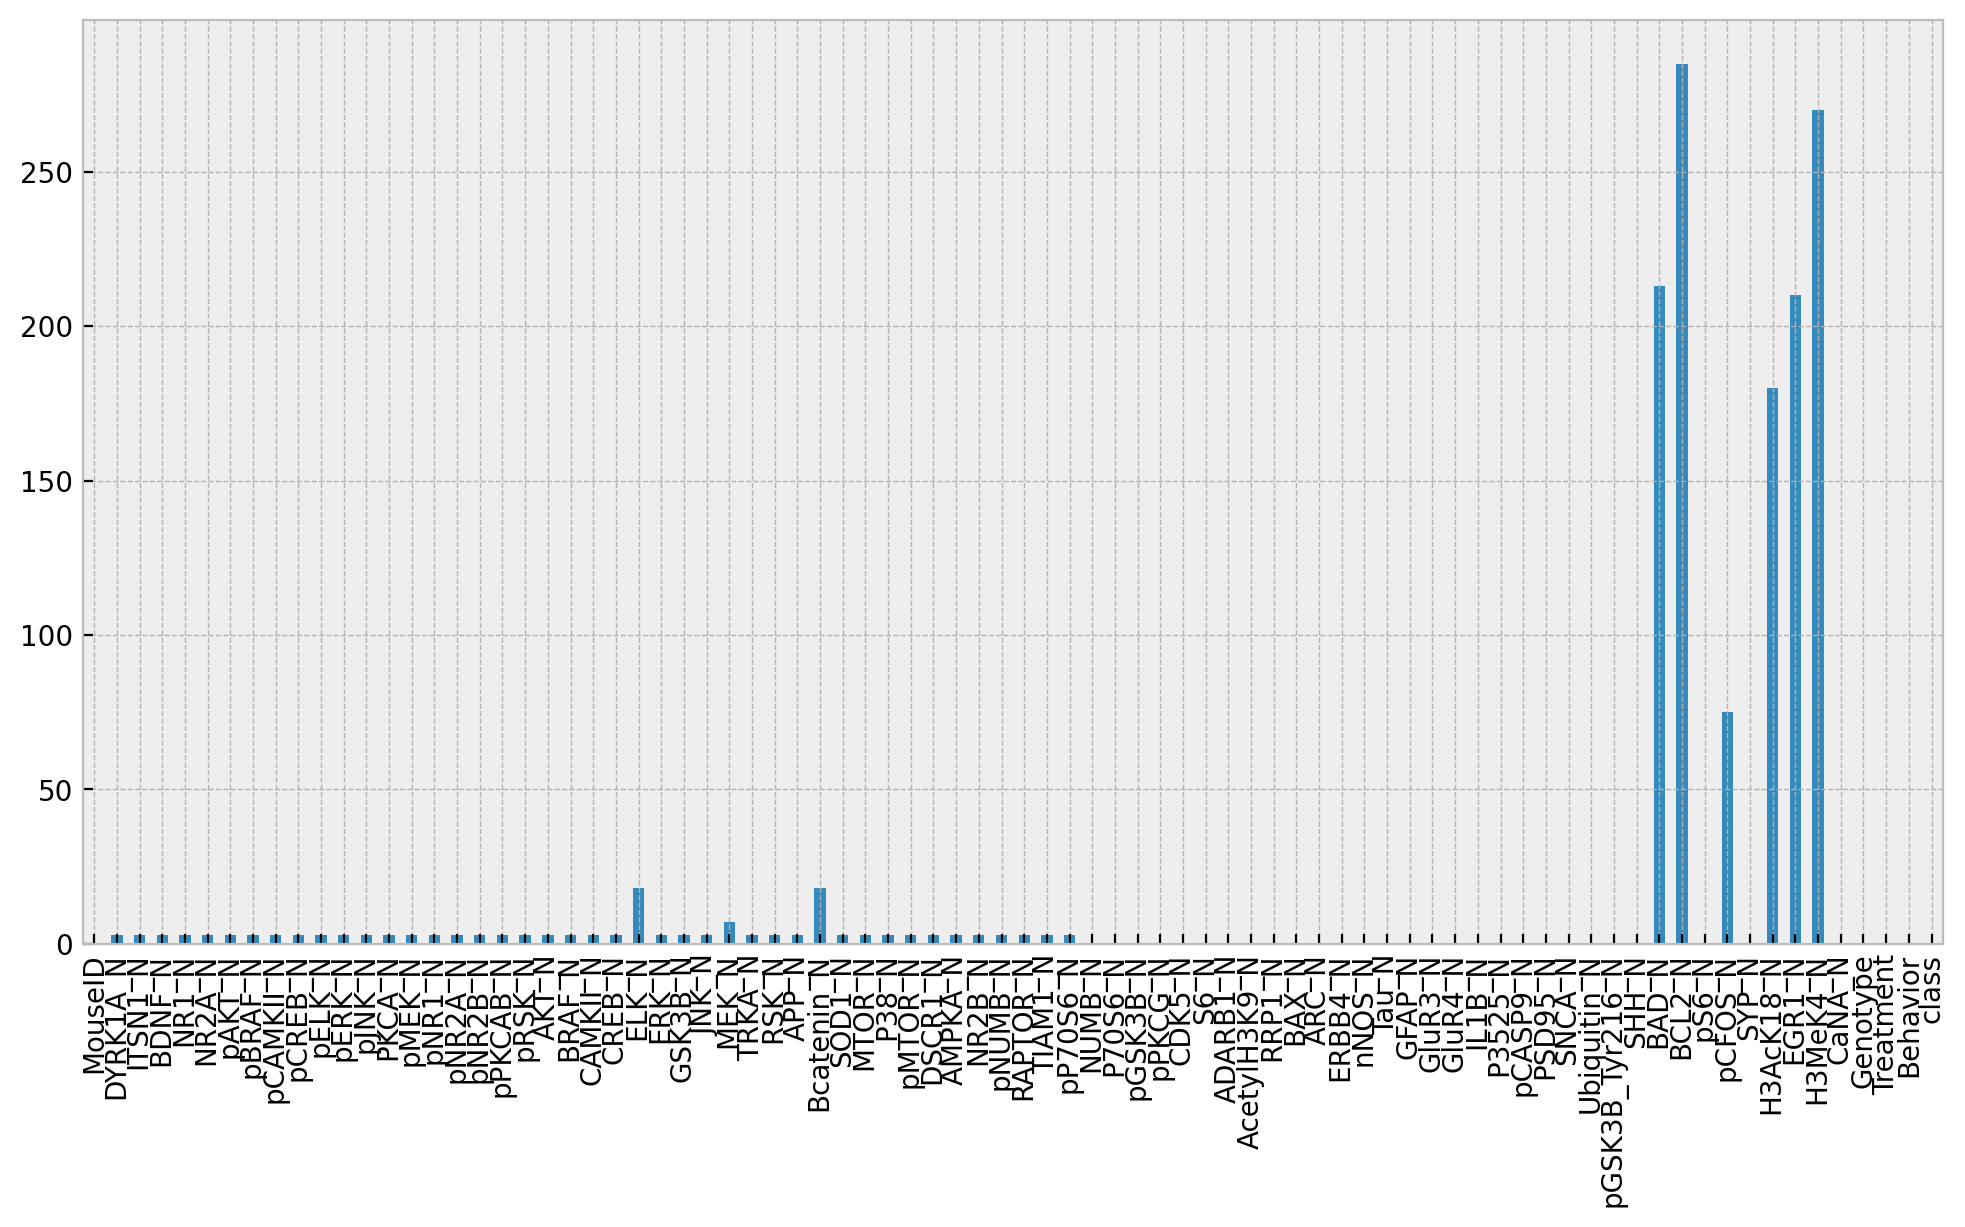

In [240]:
plt.figure(figsize=[12,6])
mice.isnull().sum().plot.bar();

In [241]:
miss_too_many = mice.isnull().sum() > 10

miss_too_many

MouseID      False
DYRK1A_N     False
ITSN1_N      False
BDNF_N       False
NR1_N        False
             ...  
CaNA_N       False
Genotype     False
Treatment    False
Behavior     False
class        False
Length: 82, dtype: bool

In [242]:
mice2 = mice.loc[:, ~miss_too_many]

mice.shape, mice2.shape

((1080, 82), (1080, 74))

In [243]:
# discard mice with missing measurements
mice3 = mice2.dropna()

mice3.shape

(1073, 74)

The dataset we will use for building a classsification model.

In [244]:
mice3

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0        309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1        309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2        309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3        309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4        309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   
...        ...       ...       ...       ...       ...       ...       ...   
1075  J3295_11  0.254860  0.463591  0.254860  2.092082  2.600035  0.211736   
1076  J3295_12  0.272198  0.474163  0.251638  2.161390  2.801492  0.251274   
1077  J3295_13  0.228700  0.395179  0.234118  1.733184  2.220852  0.220665   
1078  J3295_14  0.221242  0.412894  0.243974  1.876347  2.384088  0.208897   
1079  J3295_15  0.302626  0.461059  0.256564  2.092790  2.594348  0.251001   

       pBRAF_N  pCAMKII_N   pCREB_N  ...  Ubiquitin_N  pGSK3B_Tyr216_N  \
0     0.177565   2.373744  0.232224  ...     1.044979         0.831557   
1     0.172817   2.292150  0.226972  ...     1.009883         0.849270   
2     0.175722   2.283337  0.230247  ...     0.996848         0.846709   
3     0.176463   2.152301  0.207004  ...     0.990225         0.833277   
4     0.173627   2.134014  0.192158  ...     0.997775         0.878668   
...        ...        ...       ...  ...          ...              ...   
1075  0.171262   2.483740  0.207317  ...     1.261651         0.962942   
1076  0.182496   2.512737  0.216339  ...     1.254872         0.983690   
1077  0.161435   1.989723  0.185164  ...     1.242248         0.976609   
1078  0.173623   2.086028  0.192044  ...     1.301071         0.989286   
1079  0.191811   2.361816  0.223632  ...     1.267120         1.020383   

         SHH_N     pS6_N     SYP_N    CaNA_N  Genotype  Treatment  Behavior  \
0     0.188852  0.106305  0.427099  1.675652   Control  Memantine       C/S   
1     0.200404  0.106592  0.441581  1.743610   Control  Memantine       C/S   
2     0.193685  0.108303  0.435777  1.926427   Control  Memantine       C/S   
3     0.192112  0.103184  0.391691  1.700563   Control  Memantine       C/S   
4     0.205604  0.104784  0.434154  1.839730   Control  Memantine       C/S   
...        ...       ...       ...       ...       ...        ...       ...   
1075  0.275547  0.115806  0.374088  1.364823    Ts65Dn     Saline       S/C   
1076  0.283207  0.113614  0.375259  1.364478    Ts65Dn     Saline       S/C   
1077  0.290843  0.118948  0.422121  1.430825    Ts65Dn     Saline       S/C   
1078  0.306701  0.125295  0.397676  1.404031    Ts65Dn     Saline       S/C   
1079  0.292330  0.118899  0.420347  1.370999    Ts65Dn     Saline       S/C   

       class  
0     c-CS-m  
1     c-CS-m  
2     c-CS-m  
3     c-CS-m  
4     c-CS-m  
...      ...  
1075  t-SC-s  
1076  t-SC-s  
1077  t-SC-s  
1078  t-SC-s  
1079  t-SC-s  

[1073 rows x 74 columns]

Split data into training and testing sets.

In [246]:
X = mice3.loc[:,'DYRK1A_N':'CaNA_N']  # just protein expression levels
y = mice3['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.3, random_state=3)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((751, 69), (322, 69), (751,), (322,))

Let's try a few different models...

In [270]:
models = [
    SVC(kernel='rbf'),
    MLPClassifier(hidden_layer_sizes=[100], random_state=1, max_iter=10000),
    MLPClassifier(hidden_layer_sizes=[500], random_state=1, max_iter=10000),
    MLPClassifier(hidden_layer_sizes=[100, 100, 30, 30, 10], random_state=1, max_iter=10000),
]

test_accuracies = []
for model in models:
    # train model on training set
    model.fit(X_train, y_train)

    # eval model accuracy on testing set
    model_test_pred = model.predict(X_test)
    model_test_accuracy = accuracy_score(y_test, model_test_pred)
    test_accuracies.append(model_test_accuracy)

How did each model do?

[0.6832298136645962, 0.9968944099378882, 0.9968944099378882, 0.984472049689441]

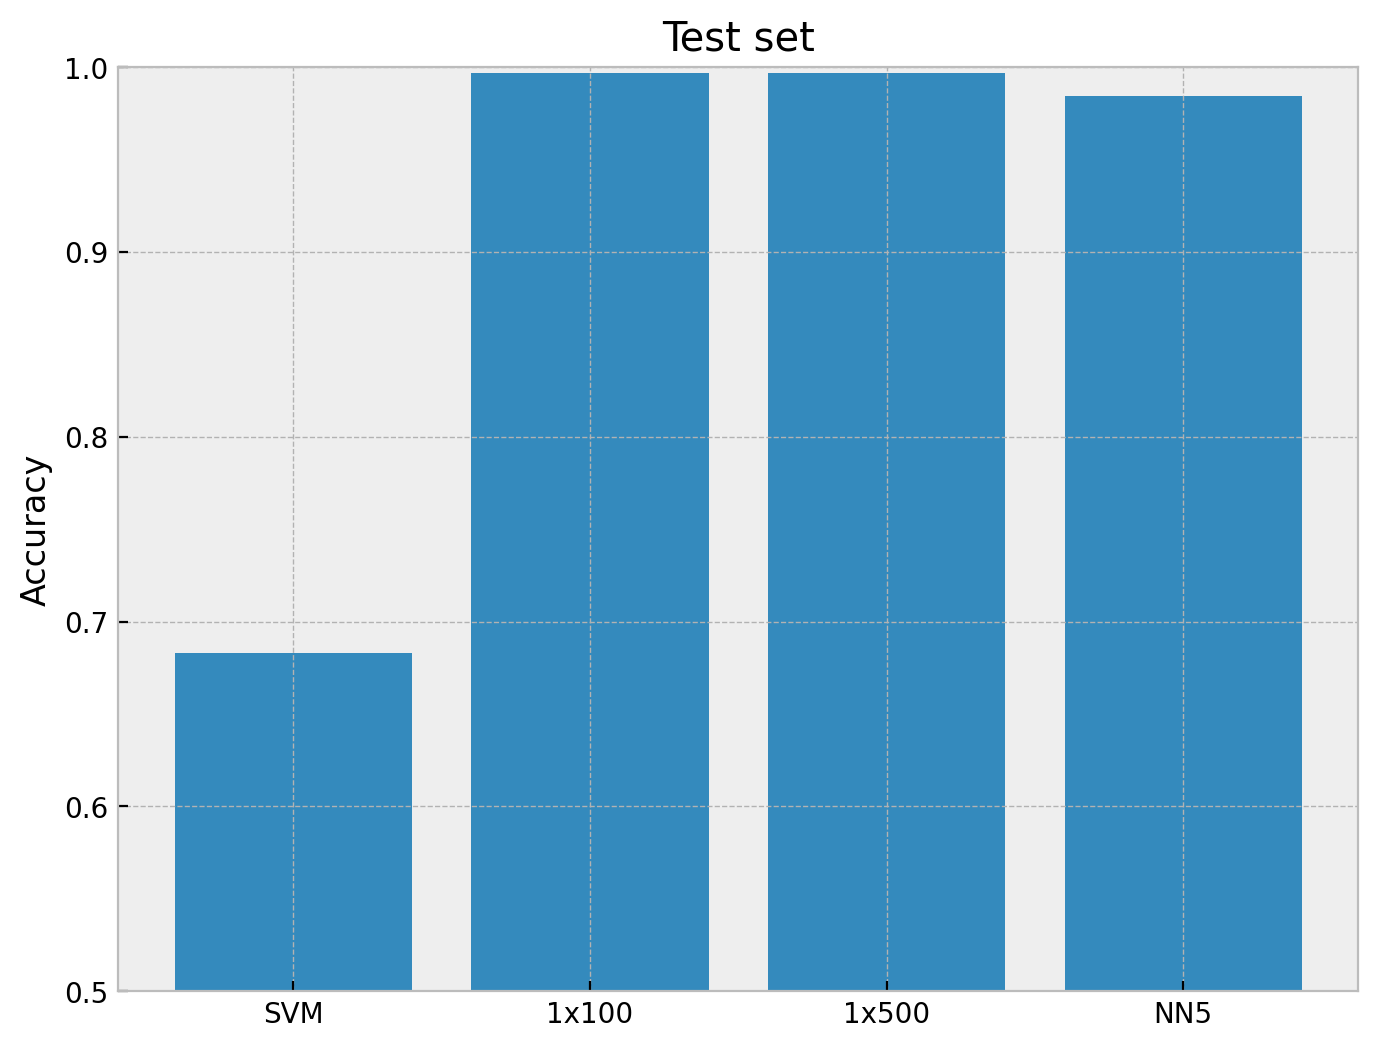

In [271]:
plt.bar(['SVM', '1x100', '1x500', 'NN5'], test_accuracies)
plt.ylabel('Accuracy')
plt.title('Test set')
plt.ylim([0.5, 1]);

test_accuracies

### Exercise
Optimize the SVC misclassification penalty `C` using cross validation.

In [ ]:
# from sklearn.model_selection import GridSearchCV

# model = SVC(kernel='rbf')

# # try these values for the penalty C
# params = {'C': np.linspace(100, 300, 50)}

# # grid search cross validation to find best params
# search = GridSearchCV(..., cv=5, scoring='accuracy')
# ...

# search.best_estimator_

### Exercise key
Optimize the SVC misclassification penalty `C` using cross validation.

In [272]:
from sklearn.model_selection import GridSearchCV

model = SVC(kernel='rbf')

# try these values for the penalty C
params = {'C': np.linspace(100, 300, 50)}

# grid search cross validation to find best params
search = GridSearchCV(model, params, cv=5, scoring='accuracy')
search.fit(X_train, y_train)

search.best_estimator_

SVC(C=185.71428571428572)

Retrain the SVM model with optimal misclassification penalty.

In [273]:
# train on training set
model = search.best_estimator_
model.fit(X_train, y_train)

# accuracy for testing set
test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)

# replace prior SVC results with new ones
models[0] = model
test_accuracies[0] = test_accuracy

Now that you can implement a simple feed forward neural network, should you ignore everything else we covered this semester?

[1.0, 0.9968944099378882, 0.9968944099378882, 0.984472049689441]

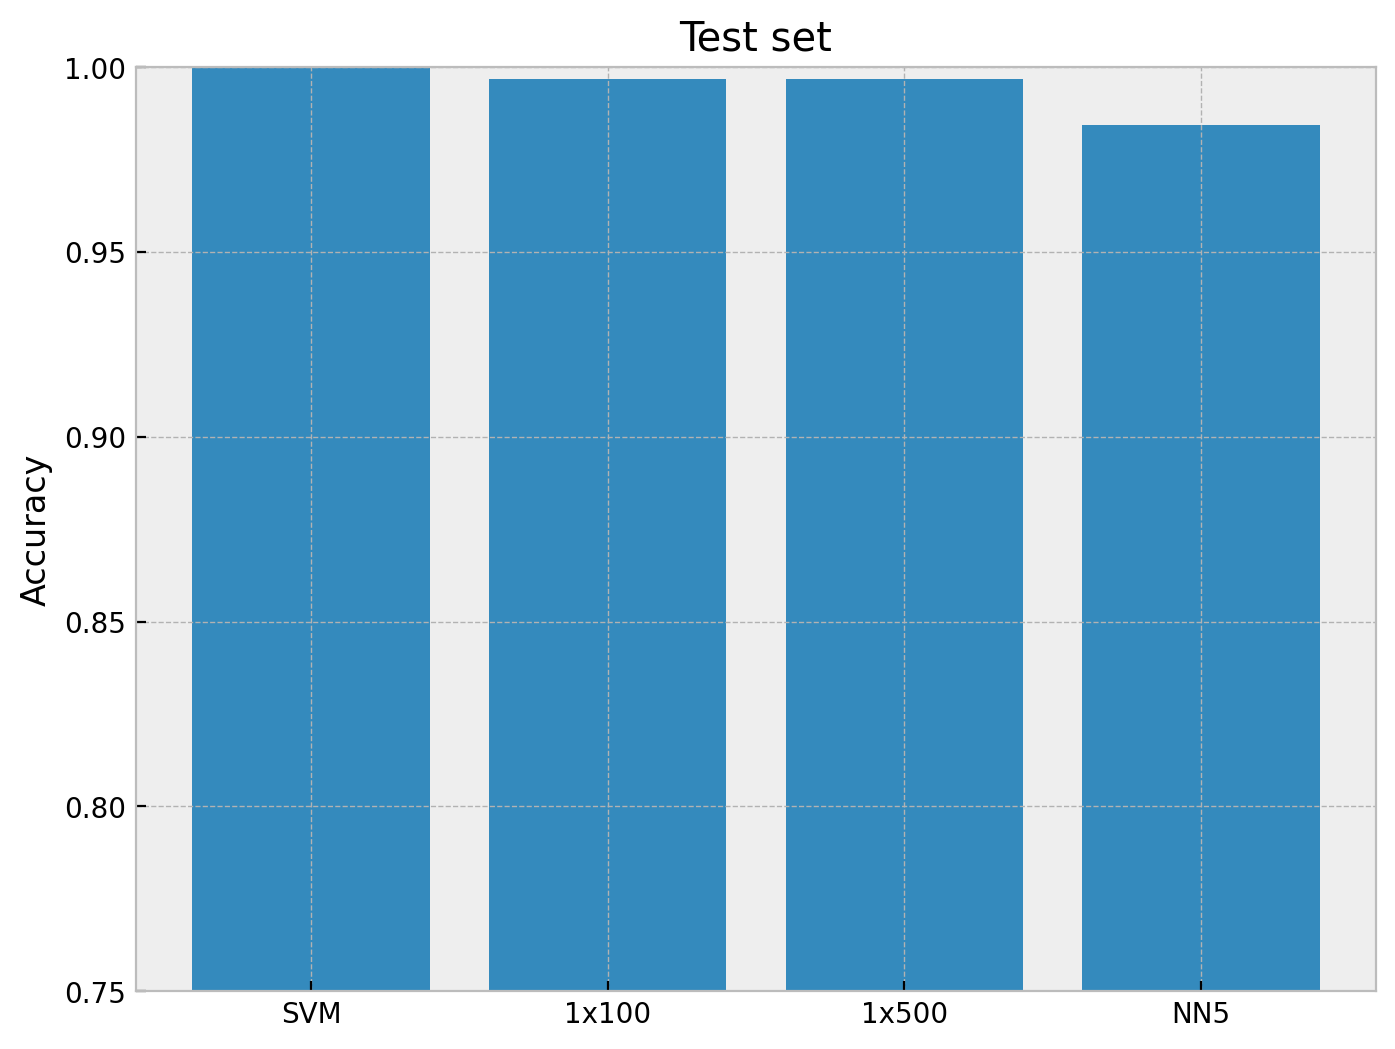

In [274]:
plt.bar(['SVM', '1x100', '1x500', 'NN5'], test_accuracies)
plt.ylabel('Accuracy')
plt.title('Test set')
plt.ylim([0.75, 1]);

test_accuracies

### Learning rate
- Too small: Will take forever for your model to converge.
- Too large: Model weights will bounce all over the place instead of converging.

In [281]:
%%timeit

net = MLPClassifier(hidden_layer_sizes=[100], learning_rate_init=1e-3, random_state=1, max_iter=10000)
net.fit(X_train, y_train)

2.26 s ± 174 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [282]:
%%timeit

net = MLPClassifier(hidden_layer_sizes=[100], learning_rate_init=1, random_state=1, max_iter=10000)
net.fit(X_train, y_train)

83.2 ms ± 12.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [283]:
%%timeit

net = MLPClassifier(hidden_layer_sizes=[100], learning_rate_init=1e-6, random_state=1, max_iter=10000)
net.fit(X_train, y_train)

5.12 s ± 228 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [287]:
net = MLPClassifier(hidden_layer_sizes=[100], learning_rate_init=1e6, random_state=1, max_iter=10000)
net.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=[100], learning_rate_init=1000000.0,
              max_iter=10000, random_state=1)

### How to decide on the structure of your neural network?

**Input layer:**
- *The input layer MUST have as many neurons as the size of your input samples* (e.g., if your input is spiking activity from 1,000 neural pixels probe units, then your input layer must have 1,000 neurons).
- Note that you didn't have to worry about this for *sklearn*'s `MLPRegressor` or `MLPClassifier` as they automatically determined the input layer size based on the data you trained them on.

### How to decide on the structure of your neural network?

**Output layer:**
- *The output layer MUST have the appropriate number of neurons for the desired output*. For regression of a single target variable, the output layer must have a single neuron. For classification with 5 possible classes, the output layer should have 5 neurons with an activation function such as softmax that will ouput 5 probabilities for each class.
- Note that `MLPRegressor` automatically has one output neuron for regression of a single target variable, and `MLPClassifier` automatically determines the number of output neurons based on the number of classes in the training data.

### How to decide on the structure of your neural network?

**Hidden layers:**
- The number of hidden layers/neurons can matter, but there is **NO *apriori* predetermined correct choice for the number of hidden layers/neurons**.
- **Before anything else**, *look at the literature related to your data* and see what other neural network structures have been successful.
- Otherwise, here are some **rules of thumb** to guide you, but keep in mind they are only a rough guide:
    - The number of hidden neurons is typically *on the order of the number of inputs plus the number of outputs*. Fewer than this may underfit, and more than this may oferfit the data.
    - *Adding layers is computationally more expensive than adding neurons to an existing layer*, so you might start with the latter.
    - *1-2 or 3-5 layers* have been successful in many cases. More than this may overfit the data.

### When to use a neural network?
- Neural networks can be great, but are *NOT gauranteed to be better than other machine learning algorithms* in all cases. **Everything else you learned this semester is still valuable.**
- Neural networks tend to be *most beneficial when you have a large amount of complex data on which to train them* (e.g., thousands to many thousands of samples in high dimensions).
- You can always compare them to several other approaches before deciding which is best in your case.

### Keep in mind

- Here, you have only explored VERY simple neural networks for regression and classification. *There's a lot more that you can do with neural networks*, a bit of which we will cover in the next couple of lectures.